<a href="https://colab.research.google.com/github/freechurro7/data_science/blob/main/Alzheimer's_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing required modules and datasets

In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score

!pip install xgboost
import xgboost as xgb

pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')

In [122]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [123]:
df = pd.read_csv("/content/drive/MyDrive/alzheimers_disease_data.csv")
df

PatientID  Age  Gender  Ethnicity  EducationLevel        BMI  Smoking  \
0          4751   73       0          0               2  22.927749        0   
1          4752   89       0          0               0  26.827681        0   
2          4753   73       0          3               1  17.795882        0   
3          4754   74       1          0               1  33.800817        1   
4          4755   89       0          0               0  20.716974        0   
...         ...  ...     ...        ...             ...        ...      ...   
2144       6895   61       0          0               1  39.121757        0   
2145       6896   75       0          0               2  17.857903        0   
2146       6897   77       0          0               1  15.476479        0   
2147       6898   78       1          3               1  15.299911        0   
2148       6899   72       0          0               2  33.289738        0   

      AlcoholConsumption  PhysicalActivity  DietQuality  SleepQuality  \
0              13.297218          6.327112     1.347214      9.025679   
1               4.542524          7.619885     0.518767      7.151293   
2              19.555085          7.844988     1.826335      9.673574   
3              12.209266          8.428001     7.435604      8.392554   
4              18.454356          6.310461     0.795498      5.597238   
...                  ...               ...          ...           ...   
2144            1.561126          4.049964     6.555306      7.535540   
2145           18.767261          1.360667     2.904662      8.555256   
2146            4.594670          9.886002     8.120025      5.769464   
2147            8.674505          6.354282     1.263427      8.322874   
2148            7.890703          6.570993     7.941404      9.878711   

      FamilyHistoryAlzheimers  CardiovascularDisease  Diabetes  Depression  \
0                           0                      0         1           1   
1                           0                      0         0           0   
2                           1                      0         0           0   
3                           0                      0         0           0   
4                           0                      0         0           0   
...                       ...                    ...       ...         ...   
2144                        0                      0         0           0   
2145                        0                      0         0           0   
2146                        0                      0         0           0   
2147                        0                      1         0           0   
2148                        0                      0         0           0   

      HeadInjury  Hypertension  SystolicBP  DiastolicBP  CholesterolTotal  \
0              0             0         142           72        242.366840   
1              0             0         115           64        231.162595   
2              0             0          99          116        284.181858   
3              0             0         118          115        159.582240   
4              0             0          94          117        237.602184   
...          ...           ...         ...          ...               ...   
2144           0             0         122          101        280.476824   
2145           0             0         152          106        186.384436   
2146           0             0         115          118        237.024558   
2147           0             0         103           96        242.197192   
2148           0             0         166           78        283.396797   

      CholesterolLDL  CholesterolHDL  CholesterolTriglycerides       MMSE  \
0          56.150897       33.682563                162.189143  21.463532   
1         193.407996       79.028477                294.630909  20.613267   
2         153.322762       69.772292                 83.638324   7.356249   
3         

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

No null values

In [125]:
df.shape

(2149, 35)

In [126]:
df.duplicated().sum()

np.int64(0)

In [127]:
df.describe()

PatientID          Age       Gender    Ethnicity  EducationLevel  \
count  2149.000000  2149.000000  2149.000000  2149.000000     2149.000000   
mean   5825.000000    74.908795     0.506282     0.697534        1.286645   
std     620.507185     8.990221     0.500077     0.996128        0.904527   
min    4751.000000    60.000000     0.000000     0.000000        0.000000   
25%    5288.000000    67.000000     0.000000     0.000000        1.000000   
50%    5825.000000    75.000000     1.000000     0.000000        1.000000   
75%    6362.000000    83.000000     1.000000     1.000000        2.000000   
max    6899.000000    90.000000     1.000000     3.000000        3.000000   

               BMI      Smoking  AlcoholConsumption  PhysicalActivity  \
count  2149.000000  2149.000000         2149.000000       2149.000000   
mean     27.655697     0.288506           10.039442          4.920202   
std       7.217438     0.453173            5.757910          2.857191   
min      15.008851     0.000000            0.002003          0.003616   
25%      21.611408     0.000000            5.139810          2.570626   
50%      27.823924     0.000000            9.934412          4.766424   
75%      33.869778     1.000000           15.157931          7.427899   
max      39.992767     1.000000           19.989293          9.987429   

       DietQuality  SleepQuality  FamilyHistoryAlzheimers  \
count  2149.000000   2149.000000              2149.000000   
mean      4.993138      7.051081                 0.252210   
std       2.909055      1.763573                 0.434382   
min       0.009385      4.002629                 0.000000   
25%       2.458455      5.482997                 0.000000   
50%       5.076087      7.115646                 0.000000   
75%       7.558625      8.562521                 1.000000   
max       9.998346      9.999840                 1.000000   

       CardiovascularDisease     Diabetes   Depression   HeadInjury  \
count            2149.000000  2149.000000  2149.000000  2149.000000   
mean                0.144253     0.150768     0.200558     0.092601   
std                 0.351428     0.357906     0.400511     0.289940   
min                 0.000000     0.000000     0.000000     0.000000   
25%                 0.000000     0.000000     0.000000     0.000000   
50%                 0.000000     0.000000     0.000000     0.000000   
75%                 0.000000     0.000000     0.000000     0.000000   
max                 1.000000     1.000000     1.000000     1.000000   

       Hypertension   SystolicBP  DiastolicBP  CholesterolTotal  \
count   2149.000000  2149.000000  2149.000000       2149.000000   
mean       0.148906   134.264774    89.847836        225.197519   
std        0.356079    25.949352    17.592496         42.542233   
min        0.000000    90.000000    60.000000        150.093316   
25%        0.000000   112.000000    74.000000        190.252963   
50%        0.000000   134.000000    91.000000        225.086430   
75%        0.000000   157.000000   105.000000        262.031657   
max        1.000000   179.000000   119.000000        299.993352   

       CholesterolLDL  CholesterolHDL  CholesterolTriglycerides         MMSE  \
count     2149.000000     2149.000000               2149.000000  2149.000000   
mean       124.335944       59.463533                228.281496    14.755132   
std         43.366584       23.139174                101.986721     8.613151   
min         50.230707       20.003434                 50.407194     0.005312   
25%         87.195798       39.095698                137.583222     7.167602   
50%        123.342593       59.768237                230.301983    14.441660   
75%        161.733733       78.939050                314.839046    22.161028   
max        199.965665       99.980324                399.941862    29.991381   

       FunctionalAssessment  MemoryComplaints  BehavioralProblems  \
count           2149.000000       2149.000000         2149.000000   
mean

Exploratory Data Anaylsis

In [128]:
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
numerical_cols.remove('PatientID')

# Measures of central tendency
mean = df[numerical_cols].mean().round(3)
median = df[numerical_cols].median().round(3)
mode = df[numerical_cols].mode().iloc[0].round(3)

# Measures of central dispersion
variance = df[numerical_cols].var().round(3)
std_dev = df[numerical_cols].std().round(3)
range_ = df[numerical_cols].max() - df[numerical_cols].min()

# Quantiles
Q1 = df[numerical_cols].quantile(0.25).round(3)
Q2= df[numerical_cols].quantile(0.50).round(3)
Q3 = df[numerical_cols].quantile(0.75).round(3)

#Interquartile range
IQR = Q3 - Q1

# Minimum and Maximum
min_ = df[numerical_cols].min()
max_ = df[numerical_cols].max()

# Skewness and kurtosis
skewness = df[numerical_cols].skew().round(3)
kurtosis = df[numerical_cols].kurtosis().round(3)

# Combine into a single DataFrame for better readability
stats_df = pd.DataFrame({'Mean': mean, 'Median': median, 'Mode': mode, 'Variance': variance, 'Std Dev': std_dev, 'Range': range_, 'Q1': Q1, 'Q2': Q2, 'Q3': Q3, 'IQR': IQR, 'Min': min_, 'Max': max_, 'Skewness': skewness, 'Kurtosis': kurtosis})

# Transpose
stats_df.T

Age  Gender  Ethnicity  EducationLevel        BMI  Smoking  \
Mean      74.909   0.506      0.698           1.287  27.656000    0.289   
Median    75.000   1.000      0.000           1.000  27.824000    0.000   
Mode      68.000   1.000      0.000           1.000  15.009000    0.000   
Variance  80.824   0.250      0.992           0.818  52.091000    0.205   
Std Dev    8.990   0.500      0.996           0.905   7.217000    0.453   
Range     30.000   1.000      3.000           3.000  24.983916    1.000   
Q1        67.000   0.000      0.000           1.000  21.611000    0.000   
Q2        75.000   1.000      0.000           1.000  27.824000    0.000   
Q3        83.000   1.000      1.000           2.000  33.870000    1.000   
IQR       16.000   1.000      1.000           1.000  12.259000    1.000   
Min       60.000   0.000      0.000           0.000  15.008851    0.000   
Max       90.000   1.000      3.000           3.000  39.992767    1.000   
Skewness   0.046  -0.025      1.230           0.209  -0.027000    0.934   
Kurtosis  -1.189  -2.001      0.234          -0.753  -1.185000   -1.128   

          AlcoholConsumption  PhysicalActivity  DietQuality  SleepQuality  \
Mean               10.039000          4.920000     4.993000      7.051000   
Median              9.934000          4.766000     5.076000      7.116000   
Mode                0.002000          0.004000     0.009000      4.003000   
Variance           33.154000          8.164000     8.463000      3.110000   
Std Dev             5.758000          2.857000     2.909000      1.764000   
Range              19.987290          9.983813     9.988961      5.997212   
Q1                  5.140000          2.571000     2.458000      5.483000   
Q2                  9.934000          4.766000     5.076000      7.116000   
Q3                 15.158000          7.428000     7.559000      8.563000   
IQR                10.018000          4.857000     5.101000      3.080000   
Min                 0.002003          0.003616     0.009385      4.002629   
Max                19.989293          9.987429     9.998346      9.999840   
Skewness            0.018000          0.045000    -0.012000     -0.070000   
Kurtosis           -1.203000         -1.179000    -1.229000     -1.212000   

          FamilyHistoryAlzheimers  CardiovascularDisease  Diabetes  \
Mean                        0.252                  0.144     0.151   
Median                      0.000                  0.000     0.000   
Mode                        0.000                  0.000     0.000   
Variance                    0.189                  0.124     0.128   
Std Dev                     0.434                  0.351     0.358   
Range                       1.000                  1.000     1.000   
Q1                          0.000                  0.000     0.000   
Q2                          0.000                  0.000     0.000   
Q3                          1.000                  0.000     0.000   
IQR                         1.000                  0.000     0.000   
Min                         0.000                  0.000     0.000   
Max                         1.000                  1.000     1.000   
Skewness                    1.142                  2.026     1.953   
Kurtosis                   -0.697                  2.109     1.817   

          Depression  HeadInjury  Hypertension  SystolicBP  DiastolicBP  \
Mean           0.201       0.093         0.149     134.265       89.848   
Median         0.000       0.000         0.000     134.000       91.000   
Mode           0.000       0.000         0.000     155.000       61.000   
Variance       0.160       0.084         0.127     673.369      309.496   
Std Dev        0.401       0.290         0.356      25.949       17.592   
Range          1.000       1.000         1.000      89.000       59.000   
Q1             0.000       0.000         0.000     112.000       74.000   
Q2             0.000       0.000         0.000     134.000       91.000   
Q3   

In [129]:
diagnosis_counts = df['Diagnosis'].value_counts()
diagnosis_counts.rename({0: 'Negative', 1:'Positive'}, inplace=True)
diagnosis_counts

Diagnosis
Negative    1389
Positive     760
Name: count, dtype: int64

Our dataset is slightly unbalanced. Ratio is 65:35 so we will not need advanced rebalancing techniques to get better metrics

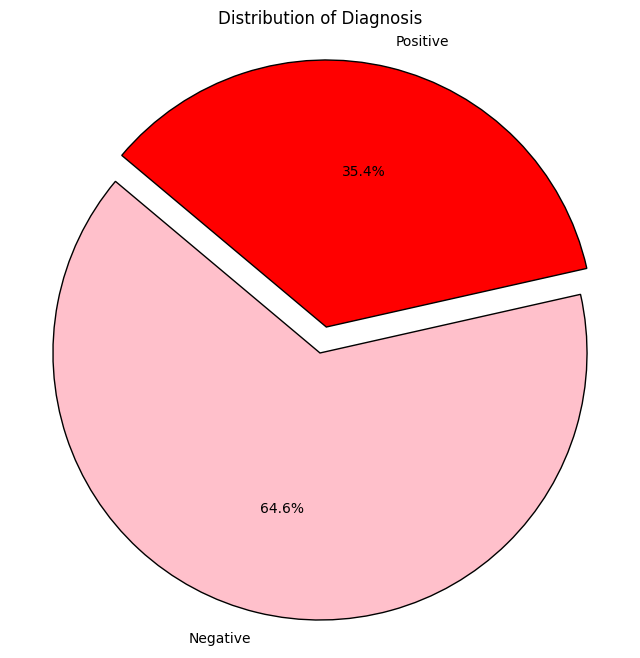

In [130]:
# Pie chart
plt.figure(figsize=(8, 8))
plt.pie(diagnosis_counts, autopct='%1.1f%%', startangle=140, colors=['pink', 'Red'], wedgeprops={'edgecolor': 'black'}, explode=(0.1, 0), labels=['Negative', 'Positive'])
plt.title('Distribution of Diagnosis')
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

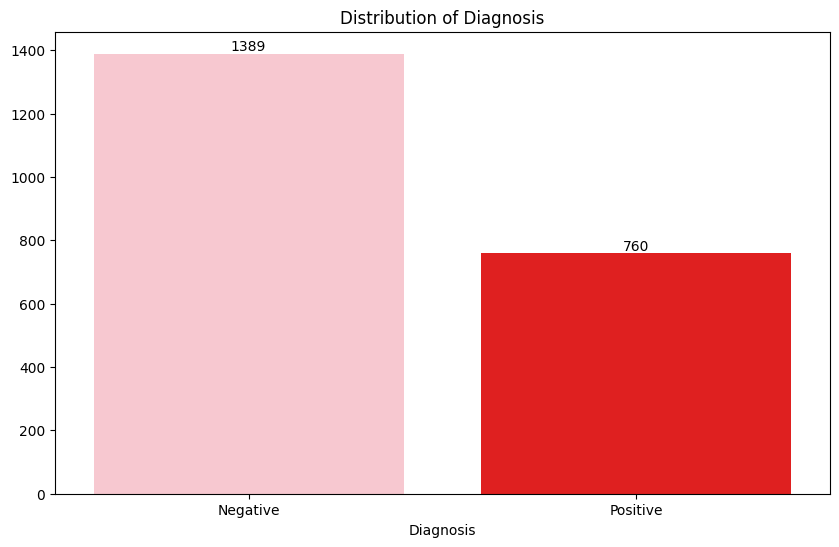

In [131]:
# Bar chart
plt.figure(figsize=(10, 6))
colors = ['pink', 'Red']
ax = sns.barplot(x=diagnosis_counts.index, y=diagnosis_counts.values, palette=colors)
plt.title('Distribution of Diagnosis')
plt.xlabel('Diagnosis')


for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10, fmt='%.0f')

plt.show()

1389 patients here have Alzheimers and 760 patients do not have Alzheimers

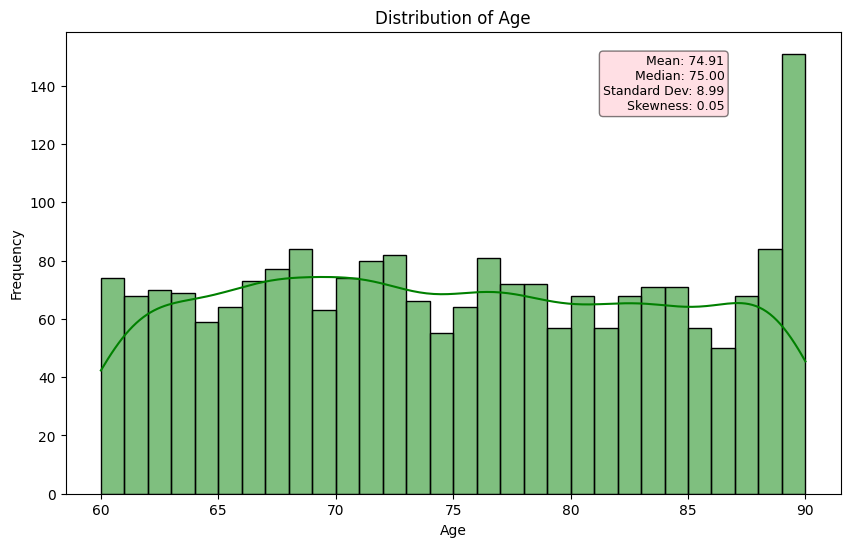

In [132]:
plt.figure(figsize=(10, 6))
ax = sns.histplot(df['Age'], kde=True, binwidth=1, color='green')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Calculate statistics for the 'Age' column
age_mean = df['Age'].mean()
age_median = df['Age'].median()
age_std_dev = df['Age'].std()
age_skewness = df['Age'].skew()


# Adds text box with statistics
stats_text = f"Mean: {age_mean:.2f}\nMedian: {age_median:.2f}\nStandard Dev: {age_std_dev:.2f}\nSkewness: {age_skewness:.2f}"
props = dict(boxstyle='round', facecolor='pink', alpha=0.5)
ax.text(0.85, 0.95, stats_text, transform=ax.transAxes, fontsize=9,
verticalalignment='top', horizontalalignment='right', bbox=props)
plt.show()

Mean age of the dataset is 74.91 and median is 75.0. That shows the age distribution is symmetric about the mean

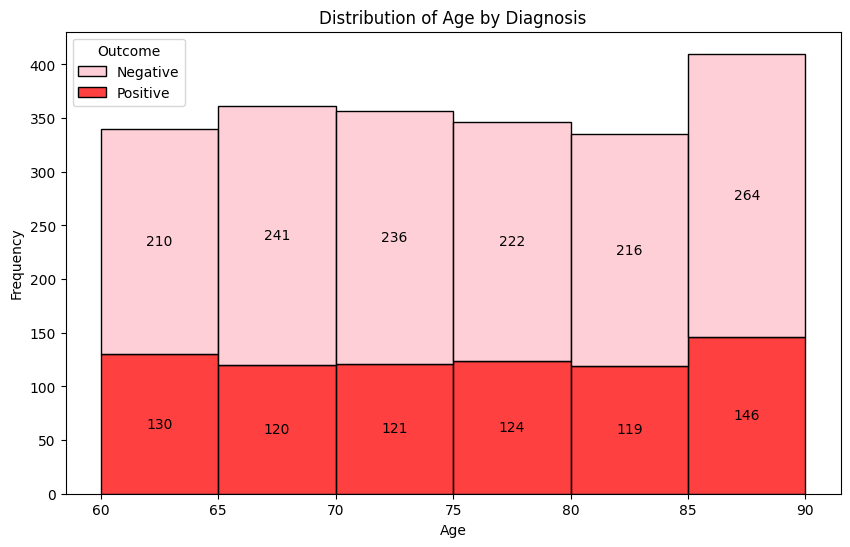

In [133]:
# Mapping 0/1 to labels
df['Outcome'] = df['Diagnosis'].map({0: 'Negative', 1: 'Positive'})

# Plotting using the new column
plt.figure(figsize=(10, 6))
colors = ['pink', 'red']
ax = sns.histplot(data=df, x='Age', hue='Outcome',multiple='stack',binwidth=5, palette=colors)
plt.title('Distribution of Age by Diagnosis')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Add bar labels
for container in ax.containers:
    ax.bar_label(container, label_type='center', fontsize=10, fmt='%.0f')

plt.show()


 There is a noticeable difference in the number of Alzheimer's patients in various age groups by diagnoses

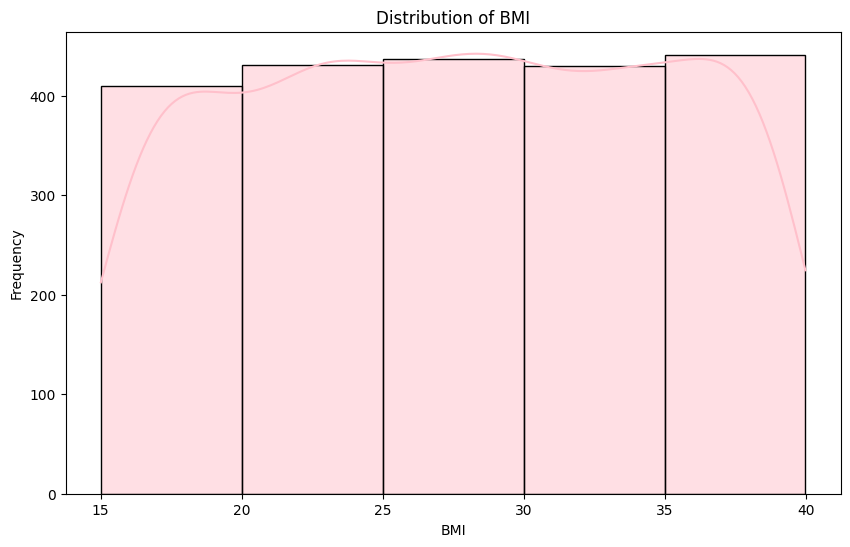

In [134]:
plt.figure(figsize=(10, 6))
sns.histplot(df['BMI'], kde=True, color='pink', bins=5)
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

There's hardly any noticeable difference in BMI distribution among our patients

In [135]:
gender_dist = df.groupby('Diagnosis')['Gender'].value_counts().unstack()
gender_dist.rename(columns={0: 'Male', 1: 'Female'}, inplace=True)
gender_dist.rename(index={0: 'Negative', 1:'Positive'}, inplace=True)
display(gender_dist)

Gender     Male  Female
Diagnosis              
Negative    675     714
Positive    386     374

We have 675 males that tested negative, 386 males that tested positive, 714 females testing negative, and 374 females testing positive

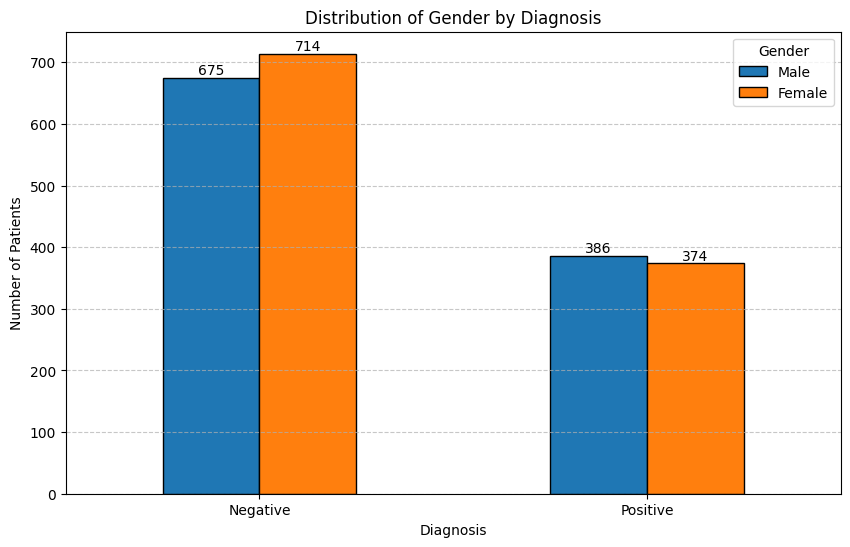

In [136]:
fig, axes = plt.subplots(figsize=(10, 6))
ax = gender_dist.plot(kind='bar', stacked=False, ax=axes, edgecolor='black')
plt.legend(title='Gender', loc='upper right')
plt.title('Distribution of Gender by Diagnosis')
plt.xlabel('Diagnosis')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylabel('Number of Patients')

for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10, fmt='%.0f')
plt.show()

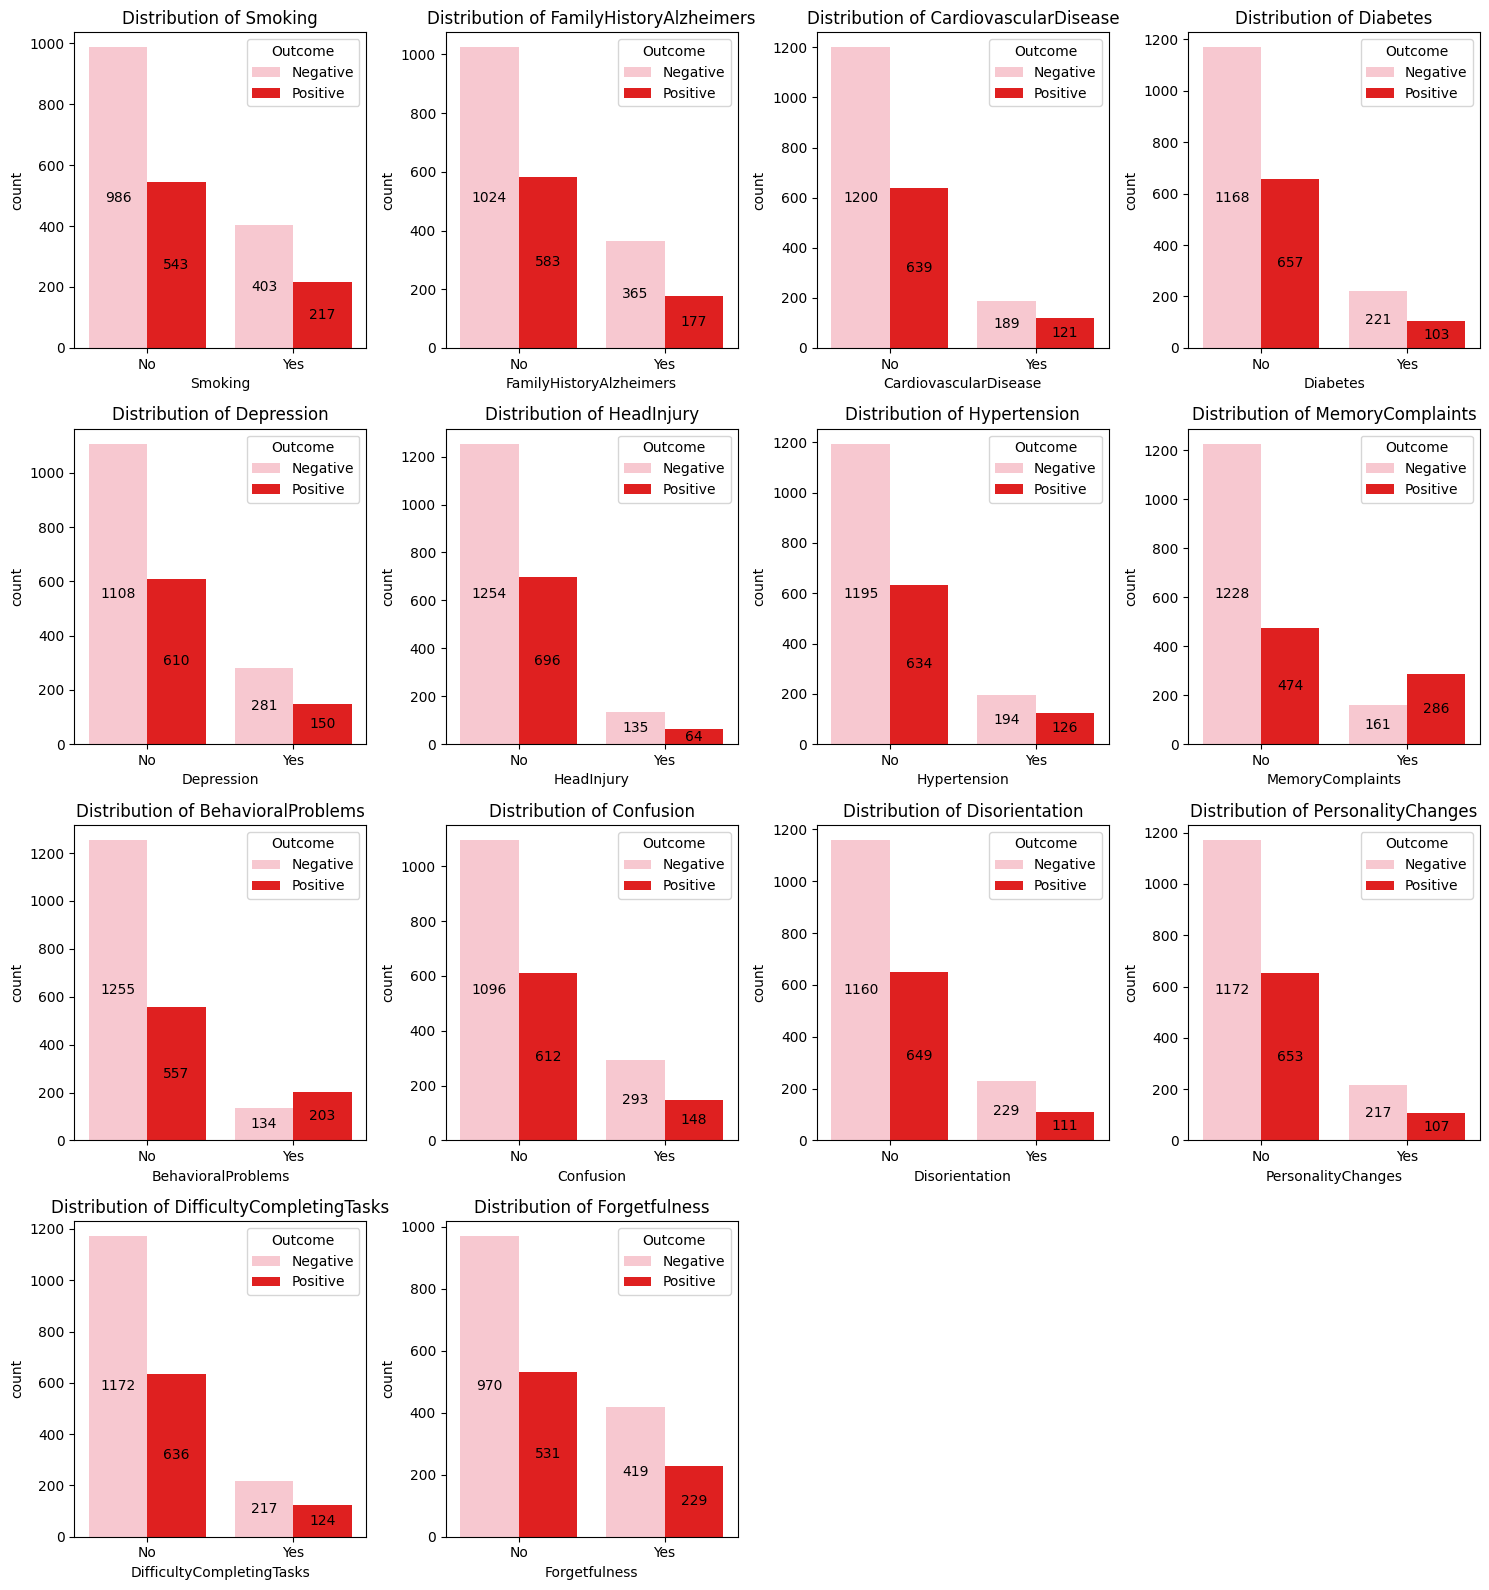

In [137]:
# Identify binary columns (excluding 'Diagnosis' and 'Gender' as they were already visualized)
binary_cols = [col for col in df.columns if df[col].nunique() == 2 and df[col].min() == 0 and df[col].max() == 1 and col != 'Diagnosis' and col != 'Gender']

# Create the grid of plots
fig, axes = plt.subplots(4, 4, figsize=(15, 16))
axes = axes.flatten() # Flatten the 2D array of axes for easy iteration

# Plot countplots for each binary column
for i, col in enumerate(binary_cols):
    sns.countplot(data=df, x=col, hue='Outcome', ax=axes[i], palette=['pink', 'Red'])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xticks([0, 1])
    axes[i].set_xticklabels(['No', 'Yes'])

    for container in axes[i].containers:
        axes[i].bar_label(container, label_type='center', fontsize=10, fmt='%.0f')


# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### **Medical & Health History Factors**

1. **Smoking**: More people who do not smoke have a negative outcome. But smoking has a higher proportion of positive outcomes.
2. **FamilyHistoryAlzheimers**: A family history of Alzheimer's is associated with a relatively higher proportion of positive outcomes.
3. **CardiovascularDisease** & **Diabetes**: Positive outcomes are more frequent among those with these conditions.
4. **HeadInjury**: Smaller group, but the proportion of positive outcomes is higher among those who had a head injury.
5. **Hypertension**: Similar pattern as above — those with hypertension have more positive outcomes proportionally.

6. **Depression**: Stronger association with positive outcomes — depression is more common among those with positive outcomes.
7. **MemoryComplaints**: Notably more associated with positive outcomes. This is a standout feature as we have more memory complaints with positive outcomes than thosw with negative outcomes
8. **BehavioralProblems**, **Confusion**, **Disorientation**, **PersonalityChanges**: All show a higher proportion of positive outcomes among the "Yes" group — indicating a strong link between these cognitive/behavioral symptoms and positive diagnoses.
9. **DifficultyCompletingTasks**, **Forgetfulness**: Again, positive outcomes are more frequent among those reporting these issues.

### **Overall Observations**

* Across most variables, individuals reporting "Yes" to a symptom or condition tend to have a **higher proportion of positive outcomes** compared to those who said "No".
* This suggests that the presence of these symptoms and conditions may be associated with the **"Positive" outcome**, which could represent a diagnosis or condition of concern (e.g., Alzheimer’s or cognitive impairment).


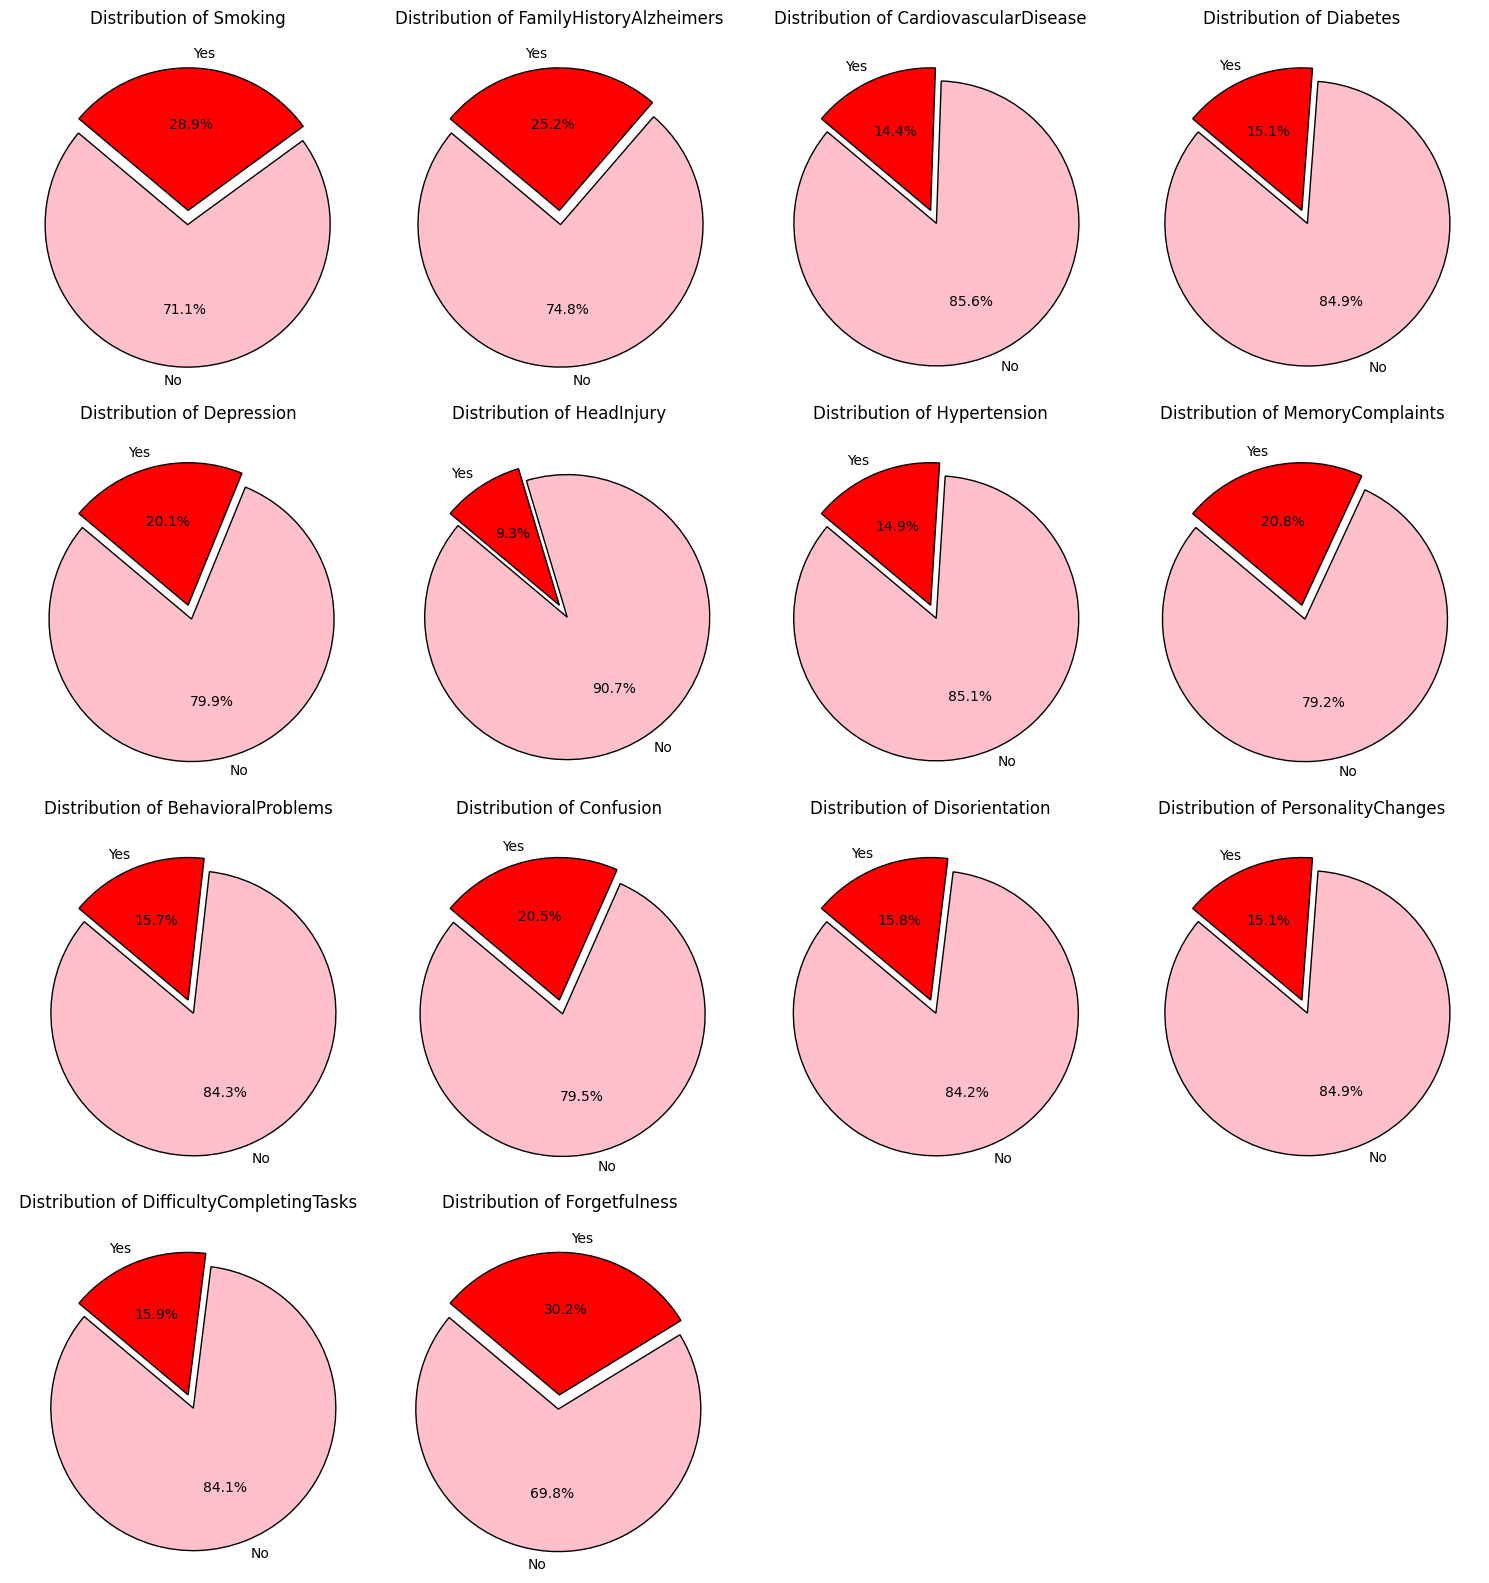

In [138]:
# Identify binary columns (excluding 'Diagnosis' and 'Gender' as they were already visualized)
binary_cols = [col for col in df.columns if df[col].nunique() == 2 and df[col].min() == 0 and df[col].max() == 1 and col != 'Diagnosis' and col != 'Gender']

# Create the grid of plots
fig, axes = plt.subplots(4, 4, figsize=(15, 16))
axes = axes.flatten() # Flatten the 2D array of axes for easy iteration

# Plot countplots for each binary column
for i, col in enumerate(binary_cols):
    axes[i].pie(df[col].value_counts(), autopct='%1.1f%%', startangle=140, colors=['pink', 'Red'], wedgeprops={'edgecolor': 'black'}, explode=(0.1, 0), labels=['No', 'Yes'])
    axes[i].set_title(f'Distribution of {col}')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Forgetfulness is the biggest indicator of the aging population (30.2% reported) according to the dataset

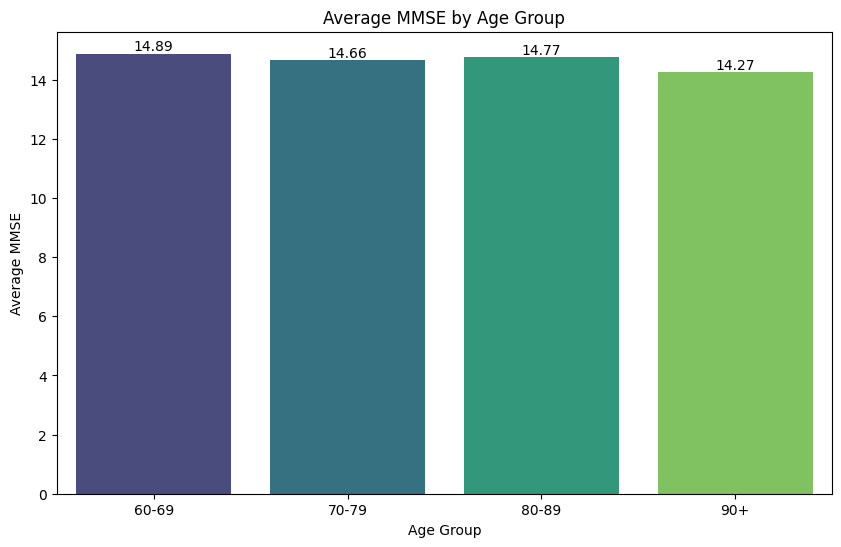

In [139]:
# Create age groups
bins = [60, 70, 80, 90, 100]
labels = ['60-69', '70-79', '80-89', '90+']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Calculate average MMSE by age group
average_mmse_by_age_group = df.groupby('AgeGroup')['MMSE'].mean().reset_index()

# Bar chart for average MMSE by age group
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='AgeGroup', y='MMSE', data=average_mmse_by_age_group, palette='viridis')
plt.title('Average MMSE by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average MMSE')

for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10, fmt='%.2f')

plt.show()

The average MMSE score remains relatively consistent across different age groups, with slight variations.

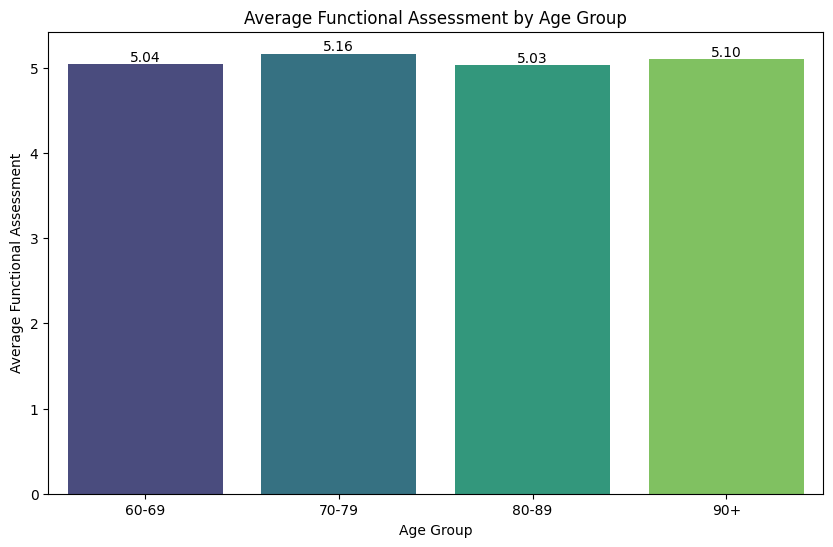

In [140]:
# Create age groups
bins = [60, 70, 80, 90, 100]
labels = ['60-69', '70-79', '80-89', '90+']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Calculate average functional_assessment by age group
average_functional_assessment_by_age_group = df.groupby('AgeGroup')['FunctionalAssessment'].mean().reset_index()

# Bar chart for average functional_assessment by age group
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='AgeGroup', y='FunctionalAssessment', data=average_functional_assessment_by_age_group, palette='viridis')
plt.title('Average Functional Assessment by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Functional Assessment')

for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10, fmt='%.2f')

plt.show()

The average functional assessment score remains relatively consistent across different age groups, with slight variations.

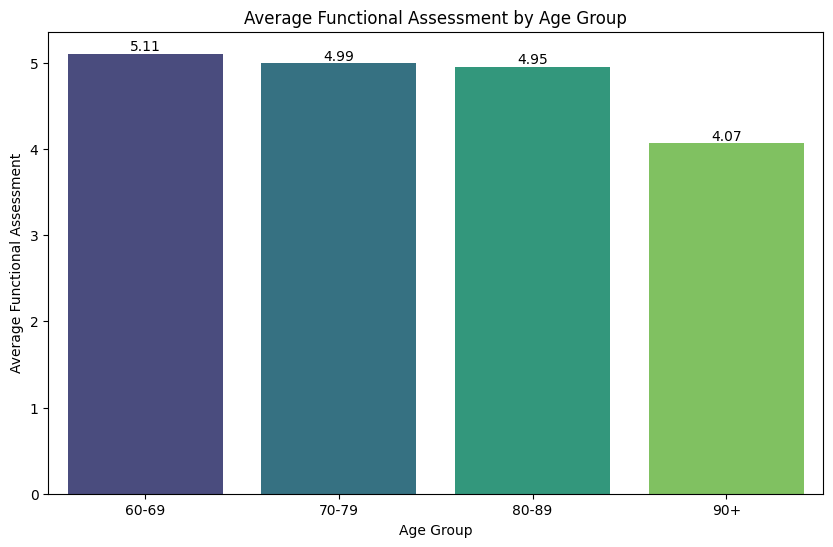

In [141]:
# Create age groups
bins = [60, 70, 80, 90, 100]
labels = ['60-69', '70-79', '80-89', '90+']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Calculate average ADL by age group
average_ADL_by_age_group = df.groupby('AgeGroup')['ADL'].mean().reset_index()

# Bar chart for average ADL by age group
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='AgeGroup', y='ADL', data=average_ADL_by_age_group, palette='viridis')
plt.title('Average Functional Assessment by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Functional Assessment')

for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10, fmt='%.2f')

plt.show()

There is a notable drop in functional assessment among the 90+ age class

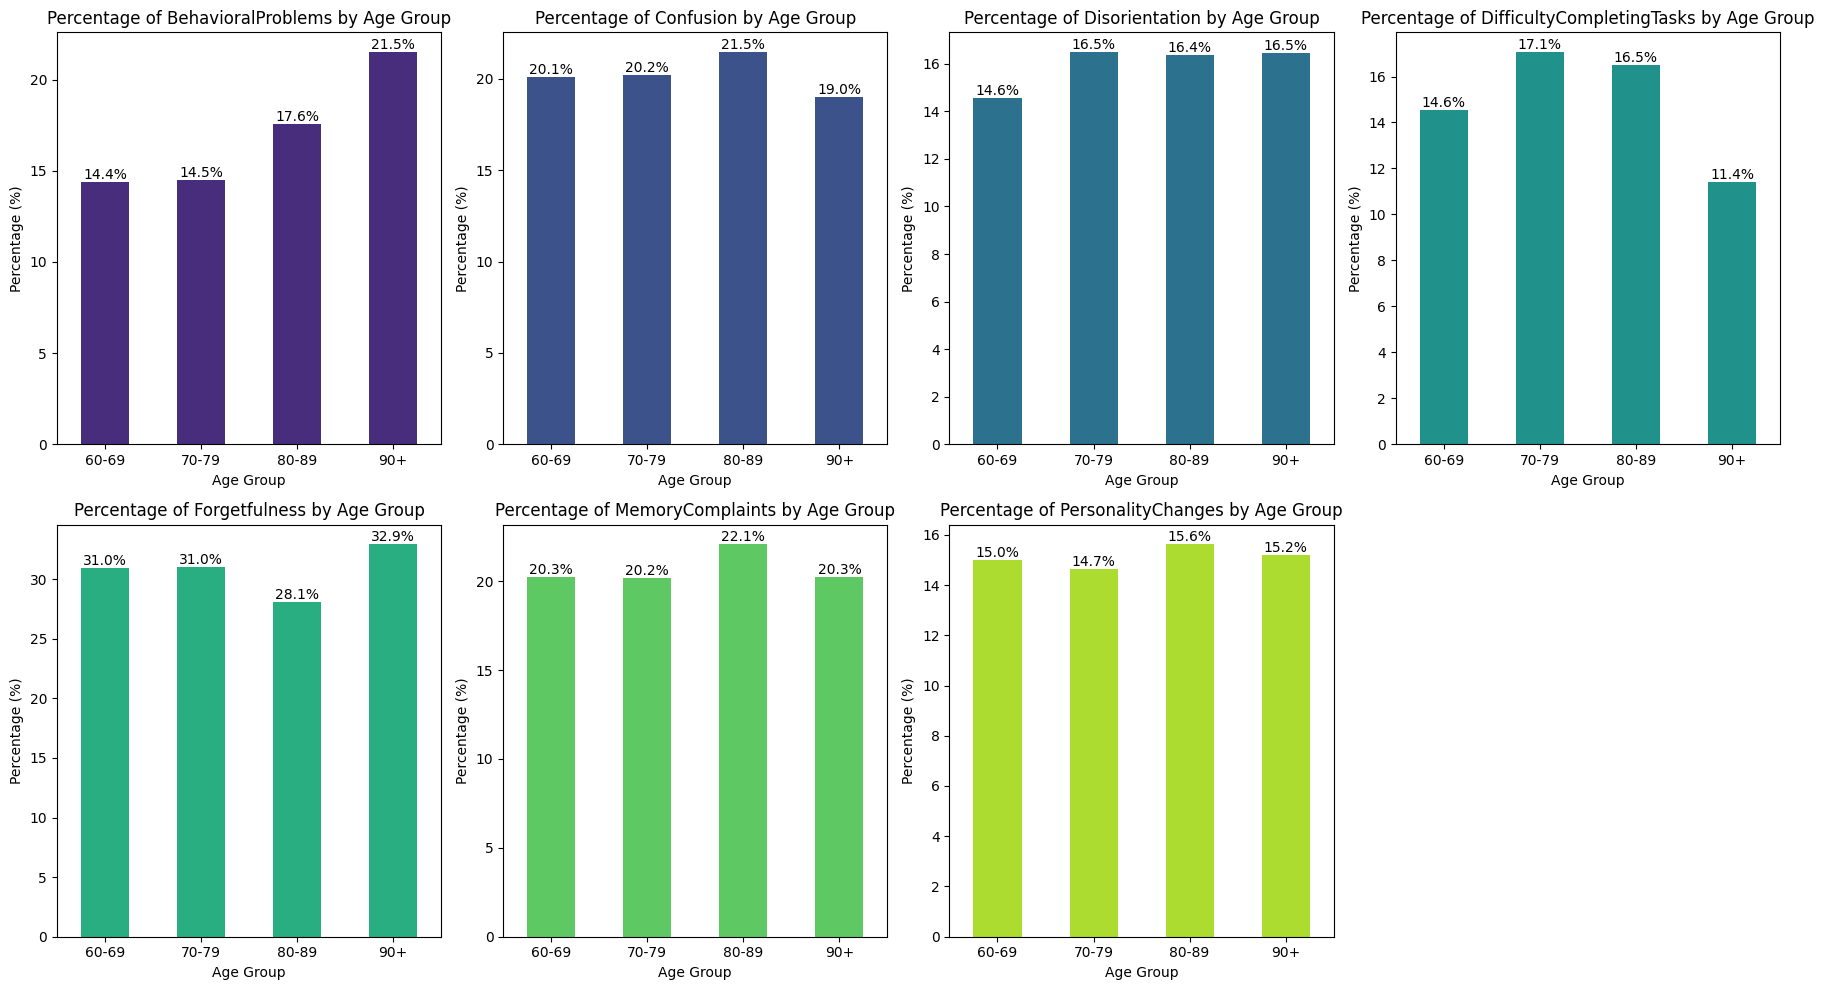

In [142]:
# Create age groups
bins = [60, 70, 80, 90, 100]
labels = ['60-69', '70-79', '80-89', '90+']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Select the relevant columns
behavioral_cols = ['BehavioralProblems', 'Confusion', 'Disorientation', 'DifficultyCompletingTasks', 'Forgetfulness', 'MemoryComplaints', 'PersonalityChanges']

# Calculate the percentage of each issue by age group
behavioral_percentages = df.groupby('AgeGroup')[behavioral_cols].mean() * 100

# Determine the number of columns to plot
num_cols = len(behavioral_cols)

# Create the grid of plots
fig, axes = plt.subplots(2, 4, figsize=(18, 10))
axes = axes.flatten() # Flatten the 2D array of axes for easy iteration

# Plotting the bar charts for each behavioral issue
for i, col in enumerate(behavioral_cols):
    ax = behavioral_percentages[col].plot(kind='bar', ax=axes[i], color=sns.color_palette('viridis', num_cols)[i])
    axes[i].set_title(f'Percentage of {col} by Age Group')
    axes[i].set_xlabel('Age Group')
    axes[i].set_ylabel('Percentage (%)')
    axes[i].tick_params(axis='x', rotation=0)

    for container in ax.containers:
        ax.bar_label(container, label_type='edge', fontsize=10, fmt='%.1f%%')


# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])


plt.tight_layout()
plt.show()

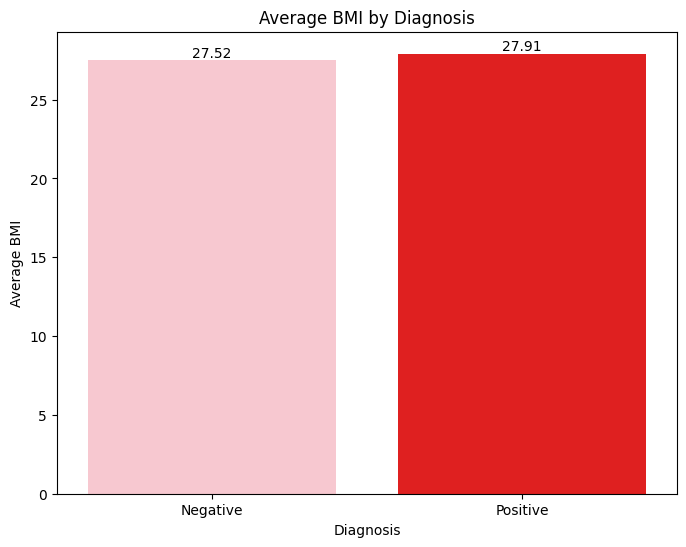

In [143]:
# Calculate average BMI by diagnosis
average_bmi_by_diagnosis = df.groupby('Diagnosis')['BMI'].mean().reset_index()
average_bmi_by_diagnosis['Diagnosis'] = average_bmi_by_diagnosis['Diagnosis'].map({0: 'Negative', 1: 'Positive'})

# Bar chart for average BMI by diagnosis
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='Diagnosis', y='BMI', data=average_bmi_by_diagnosis, palette=['pink', 'Red'])
plt.title('Average BMI by Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Average BMI')

for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10, fmt='%.2f')

plt.show()

No relationship between BMI and diagnosis outcomes

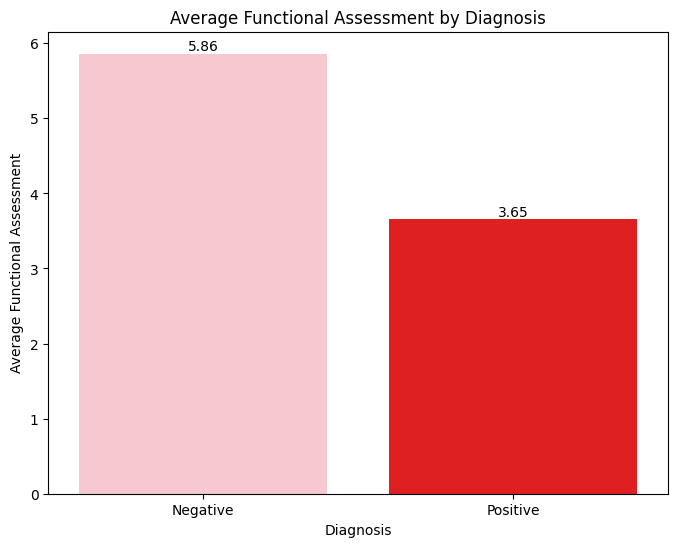

In [144]:
# Calculate average functional assessment by diagnosis
average_functional_assessment_by_diagnosis = df.groupby('Diagnosis')['FunctionalAssessment'].mean().reset_index()
average_functional_assessment_by_diagnosis['Diagnosis'] = average_functional_assessment_by_diagnosis['Diagnosis'].map({0: 'Negative', 1: 'Positive'})

# Bar chart for average functional assessment by diagnosis
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='Diagnosis', y='FunctionalAssessment', data=average_functional_assessment_by_diagnosis, palette=['pink', 'Red'])
plt.title('Average Functional Assessment by Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Average Functional Assessment')

for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10, fmt='%.2f')

plt.show()

The functional assessment tool is used to dive deeper into evaluation of functional abilities, including physical abilities (dressing and grooming), language abilities (memory and recognition), activities such as mobility or feeding themselves, and many other tasks. Patients with Alzheimer's visibly have lower functional assessment scores than those who has. This is usually more of a series of assessments rather than a single symptom that could apply to just anybody

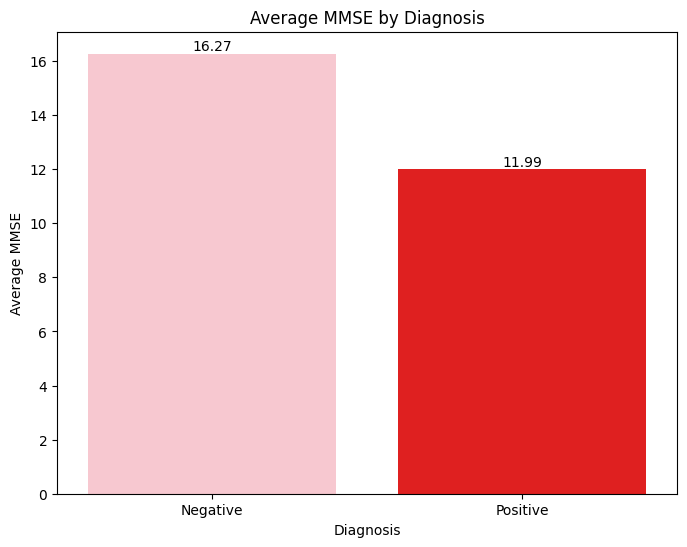

In [145]:
# Calculate average MMSE by diagnosis
average_MMSE = df.groupby('Diagnosis')['MMSE'].mean().reset_index()
average_MMSE['Diagnosis'] = average_MMSE['Diagnosis'].map({0: 'Negative', 1: 'Positive'})

# Bar chart for average MMSE by diagnosis
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='Diagnosis', y='MMSE', data=average_MMSE, palette=['pink', 'Red'])
plt.title('Average MMSE by Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Average MMSE')

for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10, fmt='%.2f')

plt.show()

Patients with Alzheimer's significantly have lower MMSE scores on average than those that don't. MMSE is a assessment of cognitive functions, including orientation, memory, attention, language, and the ability to follow instructions

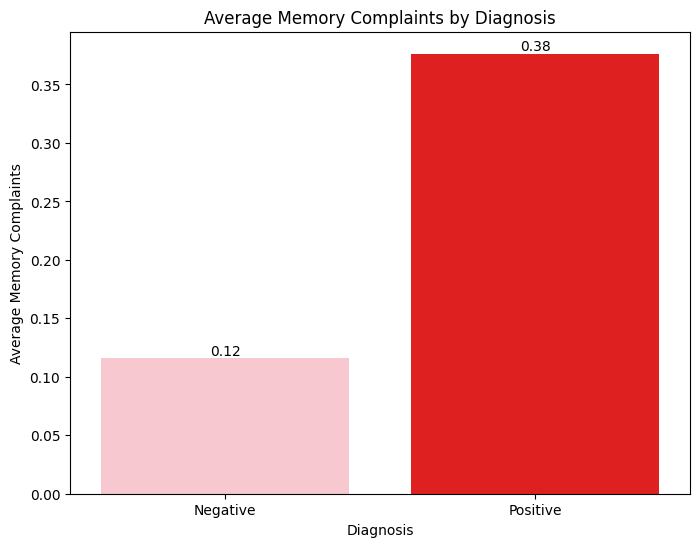

In [146]:
# Calculate average MemoryComplaints by Diagnosis
average_memory_complaints_by_diagnosis = df.groupby('Diagnosis')['MemoryComplaints'].mean().reset_index()
average_memory_complaints_by_diagnosis['Diagnosis'] = average_memory_complaints_by_diagnosis['Diagnosis'].map({0: 'Negative', 1: 'Positive'})

# Create bar chart of average MemoryComplaints by Diagnosis
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=average_memory_complaints_by_diagnosis, x='Diagnosis', y='MemoryComplaints', palette=['pink', 'Red'])
plt.title('Average Memory Complaints by Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Average Memory Complaints')

for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10, fmt='%.2f')

plt.show()

Memory complaints is more associated with positive outcomes than negative outcomes. There's a clear and significant difference here

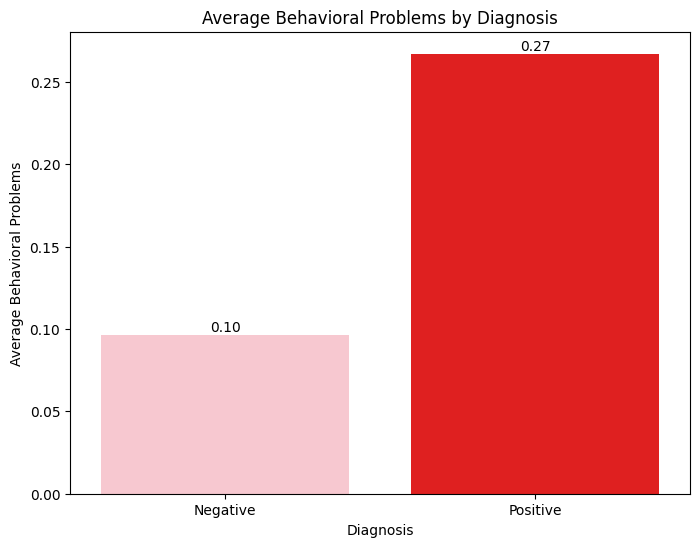

In [147]:
# Calculate average BehavioralProblems by Diagnosis
average_behavioural_problems_by_diagnosis = df.groupby('Diagnosis')['BehavioralProblems'].mean().reset_index()
average_behavioural_problems_by_diagnosis['Diagnosis'] = average_behavioural_problems_by_diagnosis['Diagnosis'].map({0: 'Negative', 1: 'Positive'})

# Create bar chart of average BehavioralProblems by Diagnosis
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=average_behavioural_problems_by_diagnosis, x='Diagnosis', y='BehavioralProblems', palette=['pink', 'Red'])
plt.title('Average Behavioral Problems by Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Average Behavioral Problems')

for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10, fmt='%.2f')

plt.show()

Behavorial problems is more associated with positive outcomes than negative outcomes. There's a clear and significant difference here

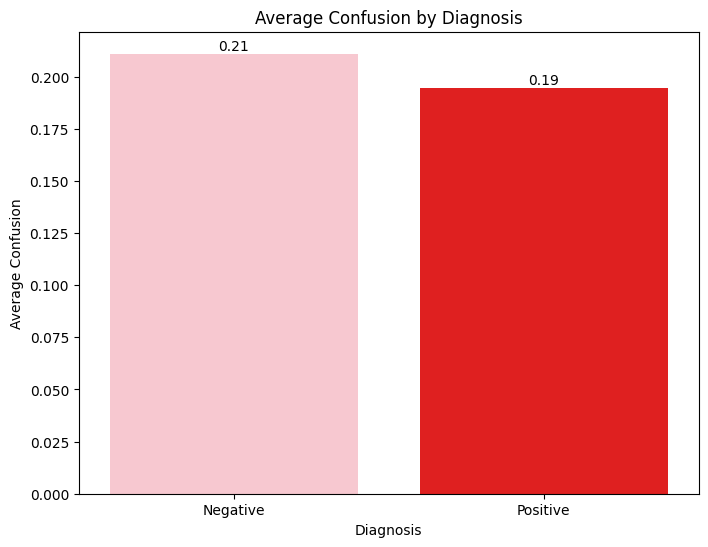

In [148]:
# Calculate average Confusion by Diagnosis
average_Confusion_by_diagnosis = df.groupby('Diagnosis')['Confusion'].mean().reset_index()
average_Confusion_by_diagnosis['Diagnosis'] = average_Confusion_by_diagnosis['Diagnosis'].map({0: 'Negative', 1: 'Positive'})

# Create bar chart of average Confusion by Diagnosis
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=average_Confusion_by_diagnosis, x='Diagnosis', y='Confusion', palette=['pink', 'Red'])
plt.title('Average Confusion by Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Average Confusion')

for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10, fmt='%.2f')

plt.show()

There's not much difference here. Hence, it's not a key indicator of Alzheimer's

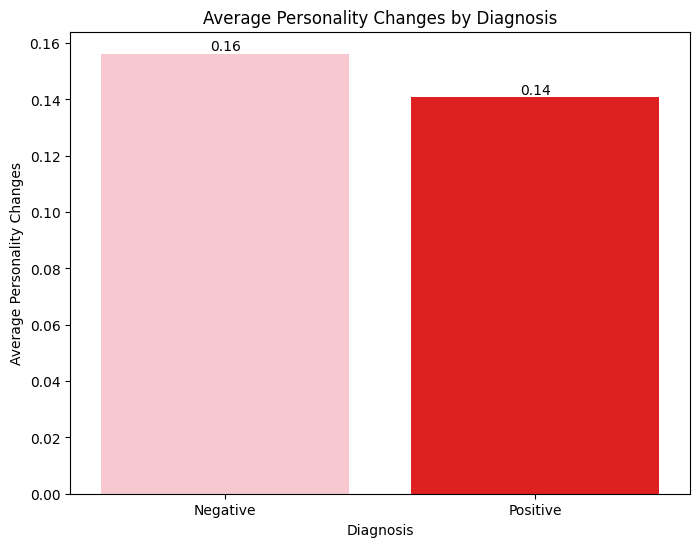

In [149]:
# Calculate average PersonalityChanges by Diagnosis
average_Personality_Changes_by_diagnosis = df.groupby('Diagnosis')['PersonalityChanges'].mean().reset_index()
average_Personality_Changes_by_diagnosis['Diagnosis'] = average_Personality_Changes_by_diagnosis['Diagnosis'].map({0: 'Negative', 1: 'Positive'})

# Create bar chart of average PersonalityChanges by Diagnosis
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=average_Personality_Changes_by_diagnosis, x='Diagnosis', y='PersonalityChanges', palette=['pink', 'Red'])
plt.title('Average Personality Changes by Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Average Personality Changes')

for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10, fmt='%.2f')

plt.show()

There's not much difference here. Hence, it's not a key indicator of Alzheimer's

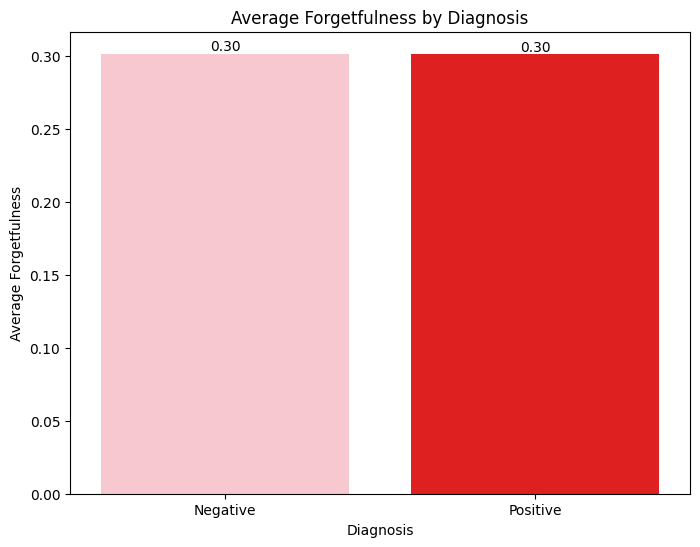

In [150]:
# Calculate average Forgetfulness by Diagnosis
average_Forgetfulness_by_diagnosis = df.groupby('Diagnosis')['Forgetfulness'].mean().reset_index()
average_Forgetfulness_by_diagnosis['Diagnosis'] = average_Forgetfulness_by_diagnosis['Diagnosis'].map({0: 'Negative', 1: 'Positive'})

# Create bar chart of average Forgetfulness by Diagnosis
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=average_Forgetfulness_by_diagnosis, x='Diagnosis', y='Forgetfulness', palette=['pink', 'Red'])
plt.title('Average Forgetfulness by Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Average Forgetfulness')

for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10, fmt='%.2f')

plt.show()

This symptom seems more like an indicator of old age than of Alzheimer's here. Hence, it's not a key indicator

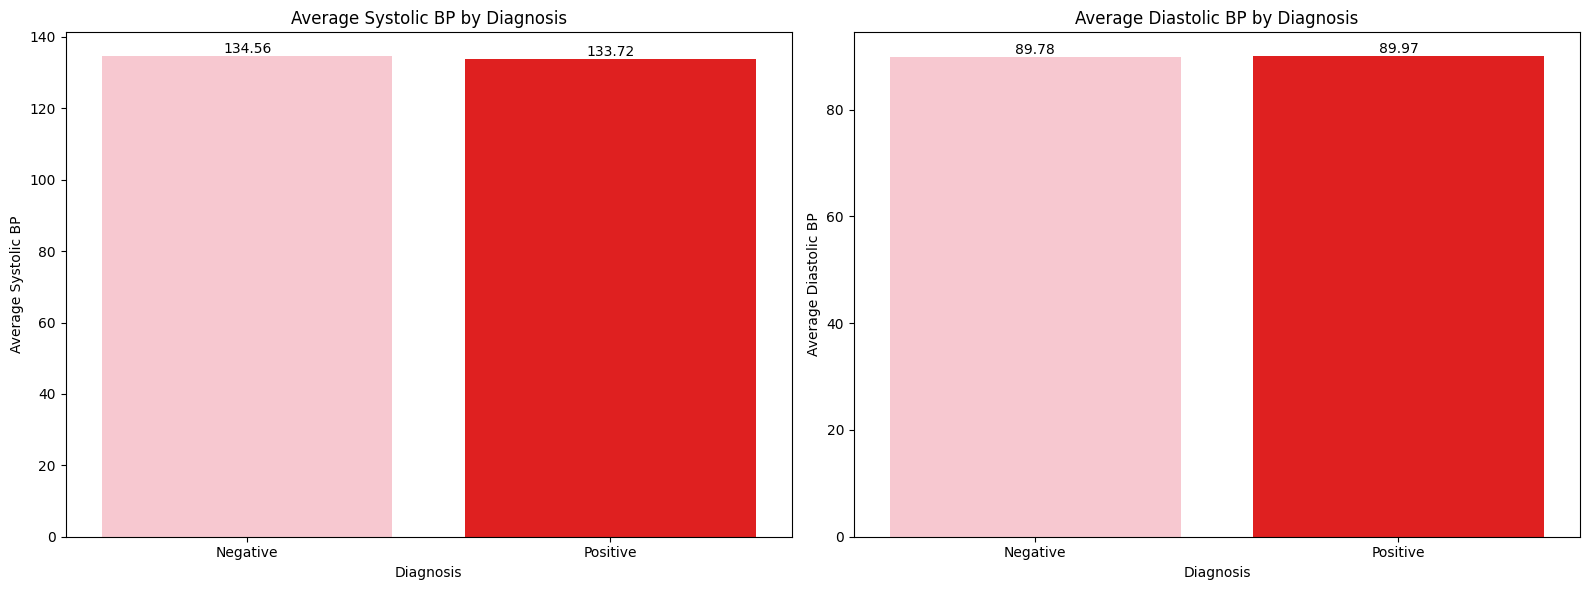

In [151]:
# Calculate average SystolicBP by diagnosis
average_systolic_bp_by_diagnosis = df.groupby('Diagnosis')['SystolicBP'].mean().reset_index()
average_systolic_bp_by_diagnosis['Diagnosis'] = average_systolic_bp_by_diagnosis['Diagnosis'].map({0: 'Negative', 1: 'Positive'})

# Calculate average DiastolicBP by diagnosis
average_diastolic_bp_by_diagnosis = df.groupby('Diagnosis')['DiastolicBP'].mean().reset_index()
average_diastolic_bp_by_diagnosis['Diagnosis'] = average_diastolic_bp_by_diagnosis['Diagnosis'].map({0: 'Negative', 1: 'Positive'})

# Create subplots for the two bar charts
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Bar chart for average SystolicBP by diagnosis
ax1 = sns.barplot(x='Diagnosis', y='SystolicBP', data=average_systolic_bp_by_diagnosis, ax=axes[0], palette=['pink', 'Red'])
ax1.set_title('Average Systolic BP by Diagnosis')
ax1.set_xlabel('Diagnosis')
ax1.set_ylabel('Average Systolic BP')
for container in ax1.containers:
    ax1.bar_label(container, label_type='edge', fontsize=10, fmt='%.2f')

# Bar chart for average DiastolicBP by diagnosis
ax2 = sns.barplot(x='Diagnosis', y='DiastolicBP', data=average_diastolic_bp_by_diagnosis, ax=axes[1], palette=['pink', 'Red'])
ax2.set_title('Average Diastolic BP by Diagnosis')
ax2.set_xlabel('Diagnosis')
ax2.set_ylabel('Average Diastolic BP')
for container in ax2.containers:
    ax2.bar_label(container, label_type='edge', fontsize=10, fmt='%.2f')

plt.tight_layout()
plt.show()

No difference in blood pressure readings between both classes

In [152]:
# Calculate average cholesterol levels by diagnosis
average_cholesterol_by_diagnosis = df.groupby('Diagnosis')[['CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides']].mean().reset_index()

# Rename columns for clarity
average_cholesterol_by_diagnosis['Diagnosis'] = average_cholesterol_by_diagnosis['Diagnosis'].map({0: 'Negative', 1: 'Positive'})


In [153]:
average_cholesterol_by_diagnosis

Diagnosis  CholesterolTotal  CholesterolLDL  CholesterolHDL  \
0  Negative        224.996342      125.361434       58.734832   
1  Positive        225.565197      122.461726       60.795330   

   CholesterolTriglycerides  
0                226.571537  
1                231.406671

In [154]:
# Melt the DataFrame for easier plotting
average_cholesterol_melted = average_cholesterol_by_diagnosis.melt(id_vars='Diagnosis', var_name='CholesterolType', value_name='AverageLevel')

In [155]:
average_cholesterol_melted

Diagnosis           CholesterolType  AverageLevel
0  Negative          CholesterolTotal    224.996342
1  Positive          CholesterolTotal    225.565197
2  Negative            CholesterolLDL    125.361434
3  Positive            CholesterolLDL    122.461726
4  Negative            CholesterolHDL     58.734832
5  Positive            CholesterolHDL     60.795330
6  Negative  CholesterolTriglycerides    226.571537
7  Positive  CholesterolTriglycerides    231.406671

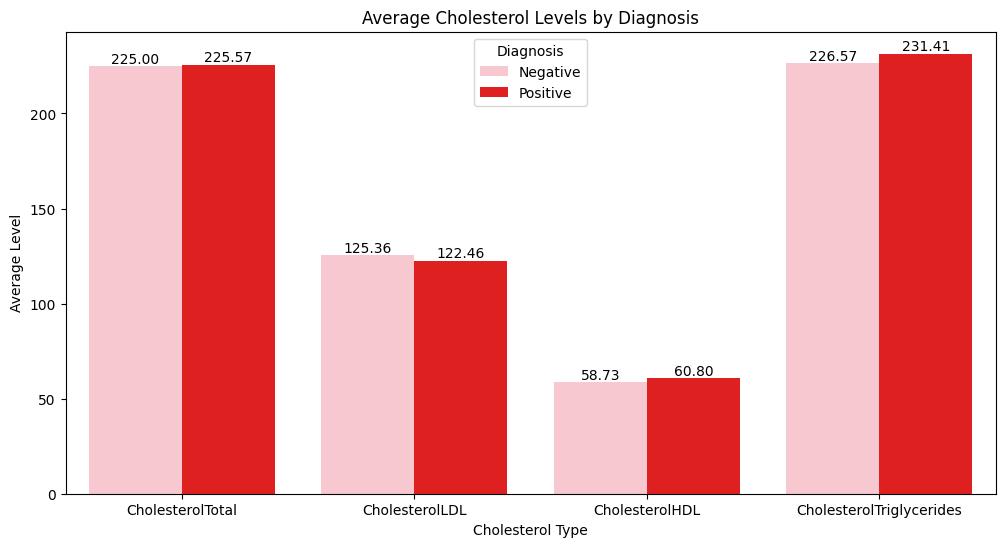

In [156]:
# Create bar chart
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=average_cholesterol_melted, x='CholesterolType', y='AverageLevel', hue='Diagnosis', palette=['pink', 'Red'])
plt.title('Average Cholesterol Levels by Diagnosis')
plt.xlabel('Cholesterol Type')
plt.ylabel('Average Level')
plt.xticks(rotation=0)
plt.legend(title='Diagnosis')

for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10, fmt='%.2f')

plt.show()

No distinct difference between cholesterol level in both classes

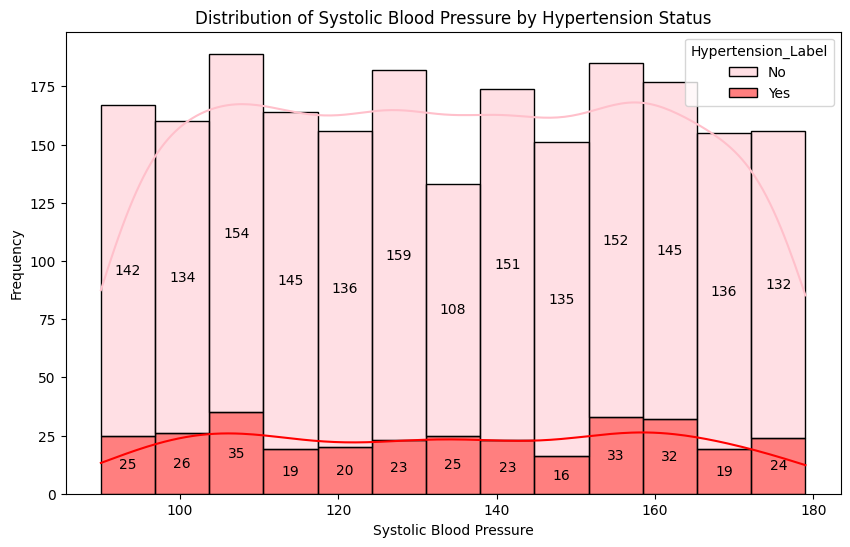

In [157]:
# Map 0/1 Hypertension to labels
df['Hypertension_Label'] = df['Hypertension'].map({0: 'No', 1: 'Yes'})

# Plotting the stacked histogram
plt.figure(figsize=(10, 6))
colors = ['pink', 'Red']
ax = sns.histplot(
    data=df,
    x='SystolicBP',
    hue='Hypertension_Label',
    multiple='stack',
    kde=True,
    palette=colors
)
plt.title('Distribution of Systolic Blood Pressure by Hypertension Status')
plt.xlabel('Systolic Blood Pressure')
plt.ylabel('Frequency')

# Add bar labels
for container in ax.containers:
    ax.bar_label(container, label_type='center', fontsize=10, fmt='%.0f')

plt.show()

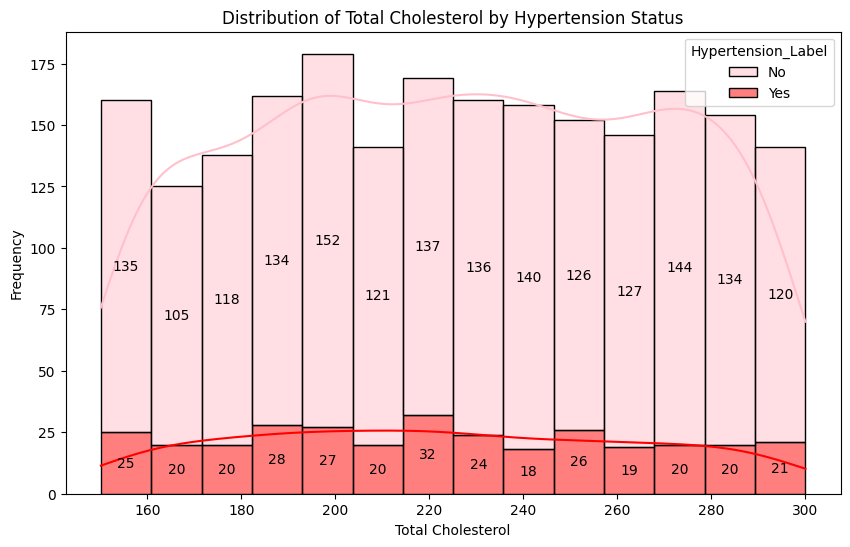

In [158]:
# Map 0/1 Hypertension to labels
df['Hypertension_Label'] = df['Hypertension'].map({0: 'No', 1: 'Yes'})

# Plotting the stacked histogram
plt.figure(figsize=(10, 6))
colors = ['pink', 'Red']
ax = sns.histplot(
    data=df,
    x='CholesterolTotal',
    hue='Hypertension_Label',
    multiple='stack',
    kde=True,
    palette=colors
)
plt.title('Distribution of Total Cholesterol by Hypertension Status')
plt.xlabel('Total Cholesterol')
plt.ylabel('Frequency')

# Add bar labels
for container in ax.containers:
    ax.bar_label(container, label_type='center', fontsize=10, fmt='%.0f')

plt.show()

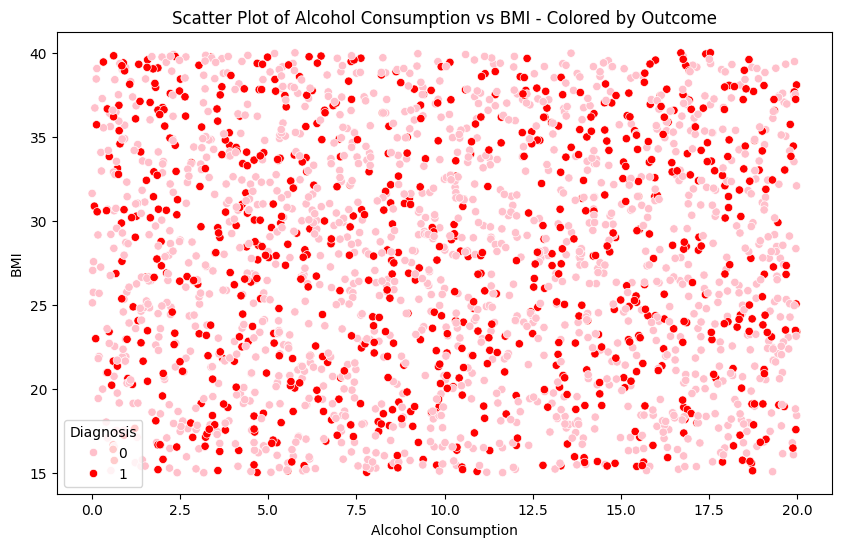

In [159]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='AlcoholConsumption', y='BMI', hue='Diagnosis', palette=['pink', 'Red'])
plt.title('Scatter Plot of Alcohol Consumption vs BMI - Colored by Outcome')
plt.ylabel('BMI')
plt.xlabel('Alcohol Consumption')
plt.show()

No relationship between alcohol consumption and BMI

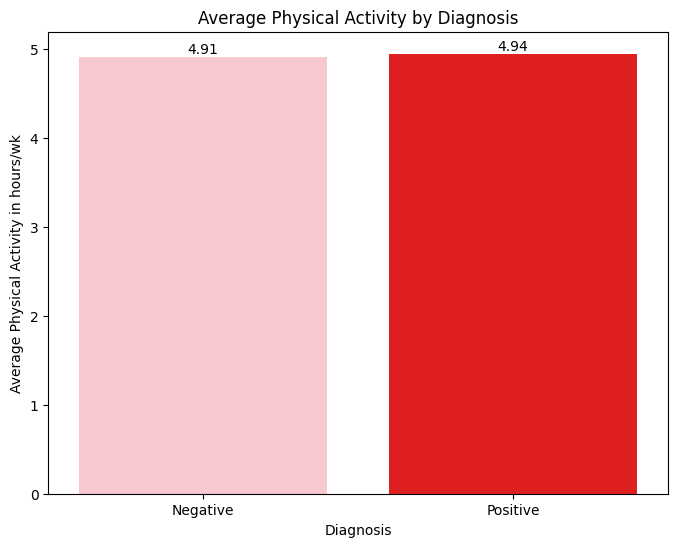

In [160]:
# Calculate average physical activity by diagnosis
average_physical_activity_by_diagnosis = df.groupby('Diagnosis')['PhysicalActivity'].mean().reset_index()
average_physical_activity_by_diagnosis['Diagnosis'] = average_physical_activity_by_diagnosis['Diagnosis'].map({0: 'Negative', 1: 'Positive'})

# Bar chart for average physical activity by diagnosis
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='Diagnosis', y='PhysicalActivity', data=average_physical_activity_by_diagnosis, palette=['pink', 'Red'])
plt.title('Average Physical Activity by Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Average Physical Activity in hours/wk')

for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10, fmt='%.2f')

plt.show()

Physical activity is more or less the same across Alzheimer's and non-Alzheimer's patient. Although, the average value ranges to a 5 hours per week, telling us there's a fair level of physical activity among older individuals

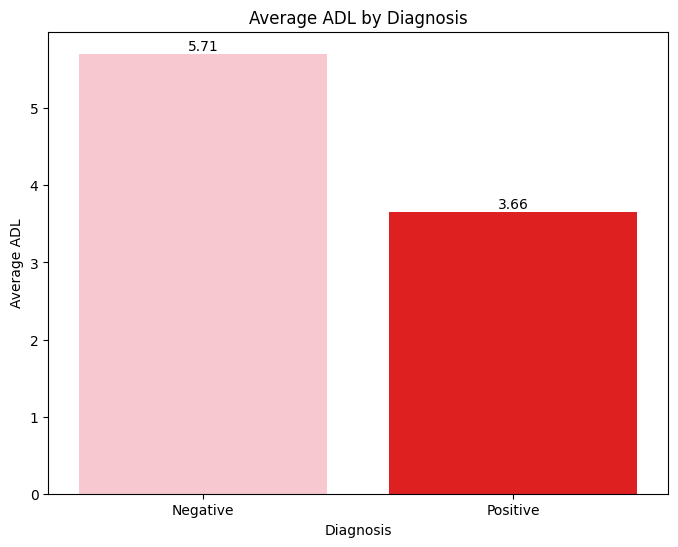

In [161]:
# Calculate average ADL by diagnosis
average_adl_by_diagnosis = df.groupby('Diagnosis')['ADL'].mean().reset_index()
average_adl_by_diagnosis['Diagnosis'] = average_adl_by_diagnosis['Diagnosis'].map({0: 'Negative', 1: 'Positive'})

# Bar chart for average ADL by diagnosis
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='Diagnosis', y='ADL', data=average_adl_by_diagnosis, palette=['pink', 'Red'])
plt.title('Average ADL by Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Average ADL')

for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10, fmt='%.2f')

plt.show()

ADLs are basic self-care tasks like eating, dressing, and bathing, and instrumental ADLs (IADLs) like managing finances and using the telephone. As AD progresses, individuals experience increasing difficulty with these tasks. In Alzheimer's disease patients like in the chart above, a decline in the ability to perform Activities of Daily Living (ADLs) is a core symptom and a key indicator of disease progression

In [162]:
df['Education_Level']= df['EducationLevel'].map({0: 'None', 1: 'High School', 2: 'Bachelor\'s Degree', 3: 'Higher'})
df['Ethnicity_Label']= df['EducationLevel'].map({0: 'Caucasian', 1: 'African American', 2: 'Asian', 3: 'Other'})

In [163]:
df

PatientID  Age  Gender  Ethnicity  EducationLevel        BMI  Smoking  \
0          4751   73       0          0               2  22.927749        0   
1          4752   89       0          0               0  26.827681        0   
2          4753   73       0          3               1  17.795882        0   
3          4754   74       1          0               1  33.800817        1   
4          4755   89       0          0               0  20.716974        0   
...         ...  ...     ...        ...             ...        ...      ...   
2144       6895   61       0          0               1  39.121757        0   
2145       6896   75       0          0               2  17.857903        0   
2146       6897   77       0          0               1  15.476479        0   
2147       6898   78       1          3               1  15.299911        0   
2148       6899   72       0          0               2  33.289738        0   

      AlcoholConsumption  PhysicalActivity  DietQuality  SleepQuality  \
0              13.297218          6.327112     1.347214      9.025679   
1               4.542524          7.619885     0.518767      7.151293   
2              19.555085          7.844988     1.826335      9.673574   
3              12.209266          8.428001     7.435604      8.392554   
4              18.454356          6.310461     0.795498      5.597238   
...                  ...               ...          ...           ...   
2144            1.561126          4.049964     6.555306      7.535540   
2145           18.767261          1.360667     2.904662      8.555256   
2146            4.594670          9.886002     8.120025      5.769464   
2147            8.674505          6.354282     1.263427      8.322874   
2148            7.890703          6.570993     7.941404      9.878711   

      FamilyHistoryAlzheimers  CardiovascularDisease  Diabetes  Depression  \
0                           0                      0         1           1   
1                           0                      0         0           0   
2                           1                      0         0           0   
3                           0                      0         0           0   
4                           0                      0         0           0   
...                       ...                    ...       ...         ...   
2144                        0                      0         0           0   
2145                        0                      0         0           0   
2146                        0                      0         0           0   
2147                        0                      1         0           0   
2148                        0                      0         0           0   

      HeadInjury  Hypertension  SystolicBP  DiastolicBP  CholesterolTotal  \
0              0             0         142           72        242.366840   
1              0             0         115           64        231.162595   
2              0             0          99          116        284.181858   
3              0             0         118          115        159.582240   
4              0             0          94          117        237.602184   
...          ...           ...         ...          ...               ...   
2144           0             0         122          101        280.476824   
2145           0             0         152          106        186.384436   
2146           0             0         115          118        237.024558   
2147           0             0         103           96        242.197192   
2148           0             0         166           78        283.396797   

      CholesterolLDL  CholesterolHDL  CholesterolTriglycerides       MMSE  \
0          56.150897       33.682563                162.189143  21.463532   
1         193.407996       79.028477                294.630909  20.613267   
2         153.322762       69.772292                 83.638324   7.356249   
3         

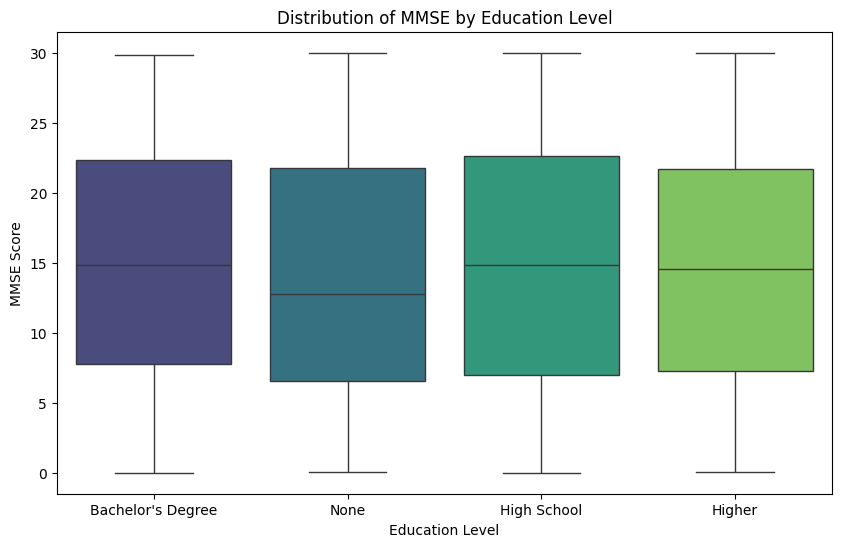

In [164]:
# Create boxplot of MMSE by Education Level and Diagnosis
plt.figure(figsize=(10, 6))

sns.boxplot(data=df, x=df['Education_Level'], y='MMSE', palette = 'viridis')
plt.title('Distribution of MMSE by Education Level')
plt.xlabel('Education Level')
plt.ylabel('MMSE Score')
plt.show()

MMSE, as suspected, is not a really a respecter of academic background or social intellect, since it involves basic questions and tasks related to orientation to time and place, immediate and delayed recall, attention, language, and the ability to follow instructions. But those with no academic background can tend to have lower MMSE scores

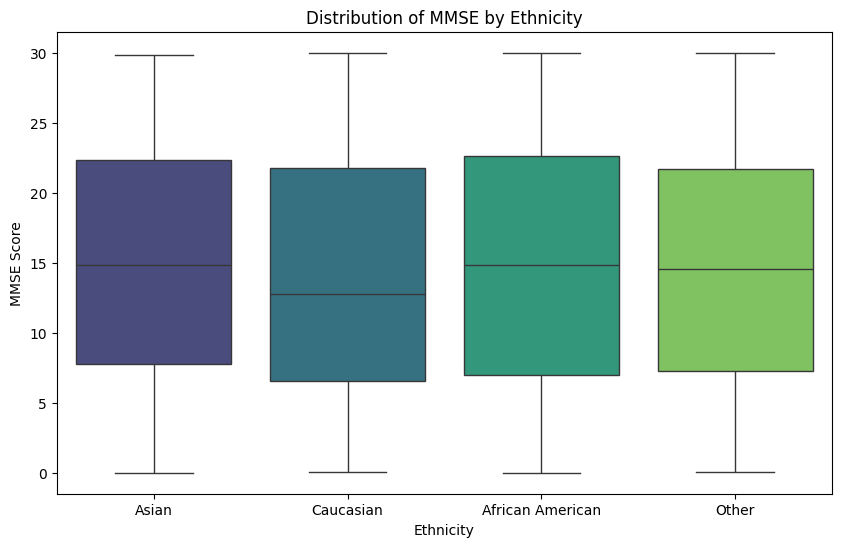

In [165]:
# Create boxplot of MMSE by Ethnicity and Diagnosis
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x=df['Ethnicity_Label'], y='MMSE', palette = 'viridis')
plt.title('Distribution of MMSE by Ethnicity')
plt.xlabel('Ethnicity')
plt.ylabel('MMSE Score')
plt.show()

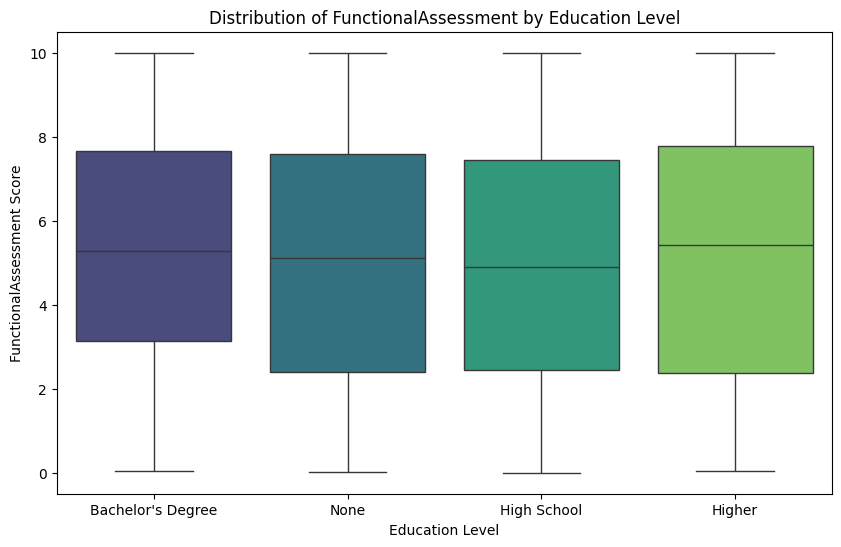

In [166]:
# Create boxplot of FunctionalAssessment by Education Level and Diagnosis
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x=df['Education_Level'], y='FunctionalAssessment', palette = 'viridis')
plt.title('Distribution of FunctionalAssessment by Education Level')
plt.xlabel('Education Level')
plt.ylabel('FunctionalAssessment Score')
plt.show()

Educational status has nothing to with functional assessments. Even illiterates can take the test without any influence on their results

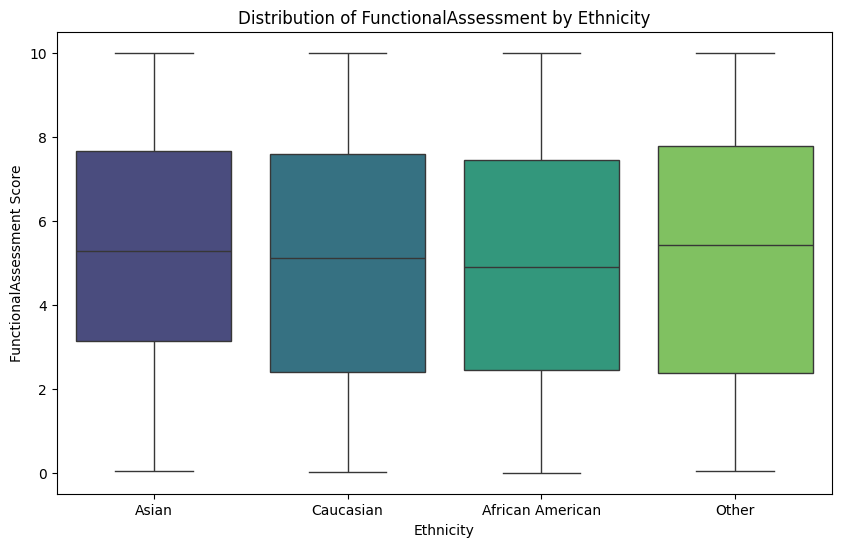

In [167]:
# Create boxplot of FunctionalAssessment by Ethnicity and Diagnosis
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x=df['Ethnicity_Label'], y='FunctionalAssessment', palette = 'viridis')
plt.title('Distribution of FunctionalAssessment by Ethnicity')
plt.xlabel('Ethnicity')
plt.ylabel('FunctionalAssessment Score')
plt.show()

Same as educational level

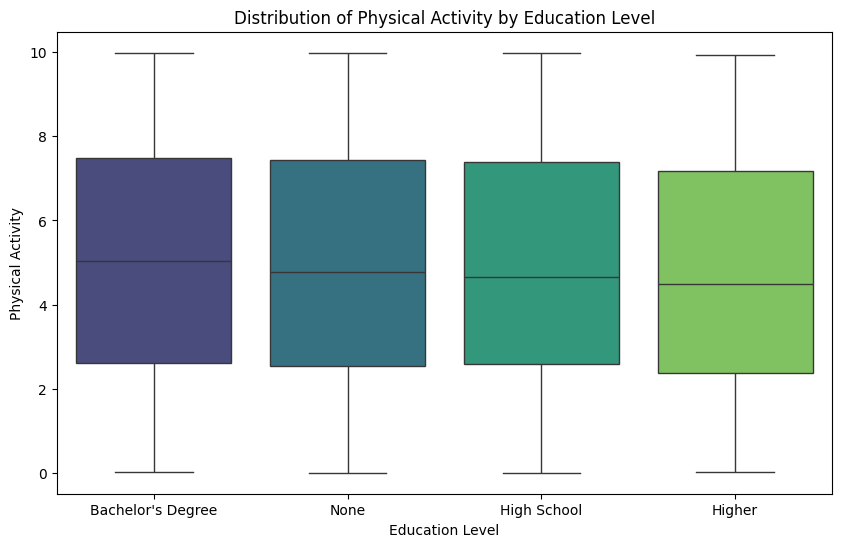

In [168]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x=df['Education_Level'], y='PhysicalActivity', palette = 'viridis')
plt.title('Distribution of Physical Activity by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Physical Activity')
plt.show()

I assumed here that educated people would exercise more because they know more of the benefits, but that wasn't the case

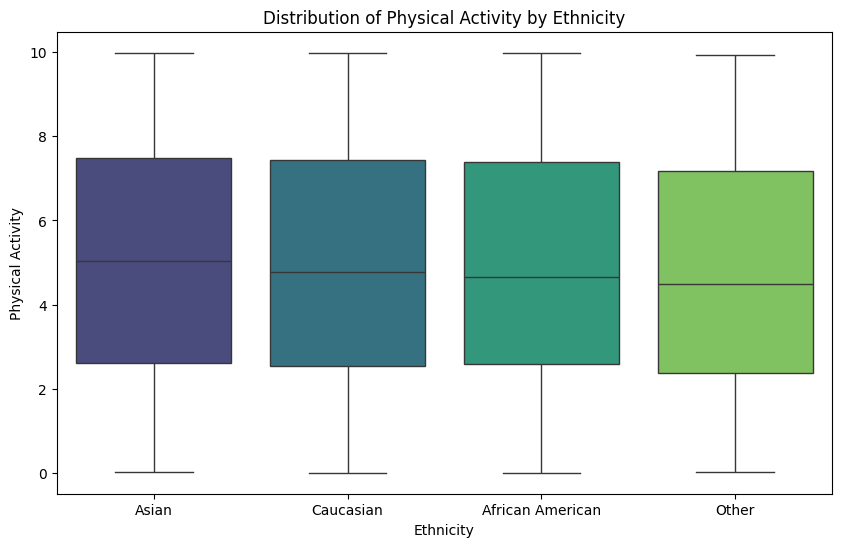

In [169]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x=df['Ethnicity_Label'], y='PhysicalActivity', palette = 'viridis')
plt.title('Distribution of Physical Activity by Ethnicity')
plt.xlabel('Ethnicity')
plt.ylabel('Physical Activity')
plt.show()

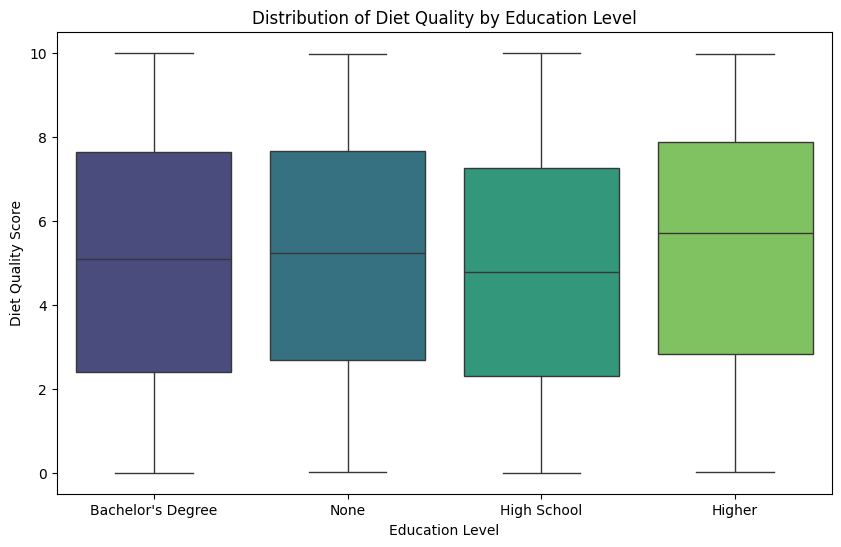

In [170]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x=df['Education_Level'], y='DietQuality', palette='viridis')
plt.title('Distribution of Diet Quality by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Diet Quality Score')
plt.show()

Those of higher academic status eat slightly better than the rest, but there's very little difference among all levels

In [171]:
# Calculate percentages for Education Level
education_counts = df.groupby('EducationLevel')['Diagnosis'].value_counts(normalize=True).unstack().fillna(0) * 100
education_counts.rename(columns={0: 'Negative', 1: 'Positive'}, inplace=True)
education_counts.rename(index={0: 'None', 1: 'High School', 2: 'Bachelor\'s Degree', 3: 'Higher'}, inplace=True)
education_counts

Diagnosis           Negative   Positive
EducationLevel                         
None               60.986547  39.013453
High School        64.637002  35.362998
Bachelor's Degree  65.880503  34.119497
Higher             68.544601  31.455399

In [172]:
# Calculate percentages for Ethnicity
ethnicity_counts = df.groupby('Ethnicity')['Diagnosis'].value_counts(normalize=True).unstack().fillna(0) * 100
ethnicity_counts.rename(columns={0: 'Negative', 1: 'Positive'}, inplace=True)
ethnicity_counts.rename(index={0: 'Caucasian', 1: 'African American', 2: 'Asian', 3: 'Other'}, inplace=True)
ethnicity_counts

Diagnosis          Negative   Positive
Ethnicity                             
Caucasian         63.771518  36.228482
African American  67.841410  32.158590
Asian             59.223301  40.776699
Other             68.246445  31.753555

In [173]:
# Calculate percentages for Family History of Alzheimer's
family_history_counts = df.groupby('FamilyHistoryAlzheimers')['Diagnosis'].value_counts(normalize=True).unstack().fillna(0) * 100
family_history_counts.rename(columns={0: 'Negative', 1: 'Positive'}, inplace=True)
family_history_counts.rename(index={0: 'No Family History', 1: 'Family History'}, inplace=True)
family_history_counts

Diagnosis                 Negative   Positive
FamilyHistoryAlzheimers                      
No Family History        63.721220  36.278780
Family History           67.343173  32.656827

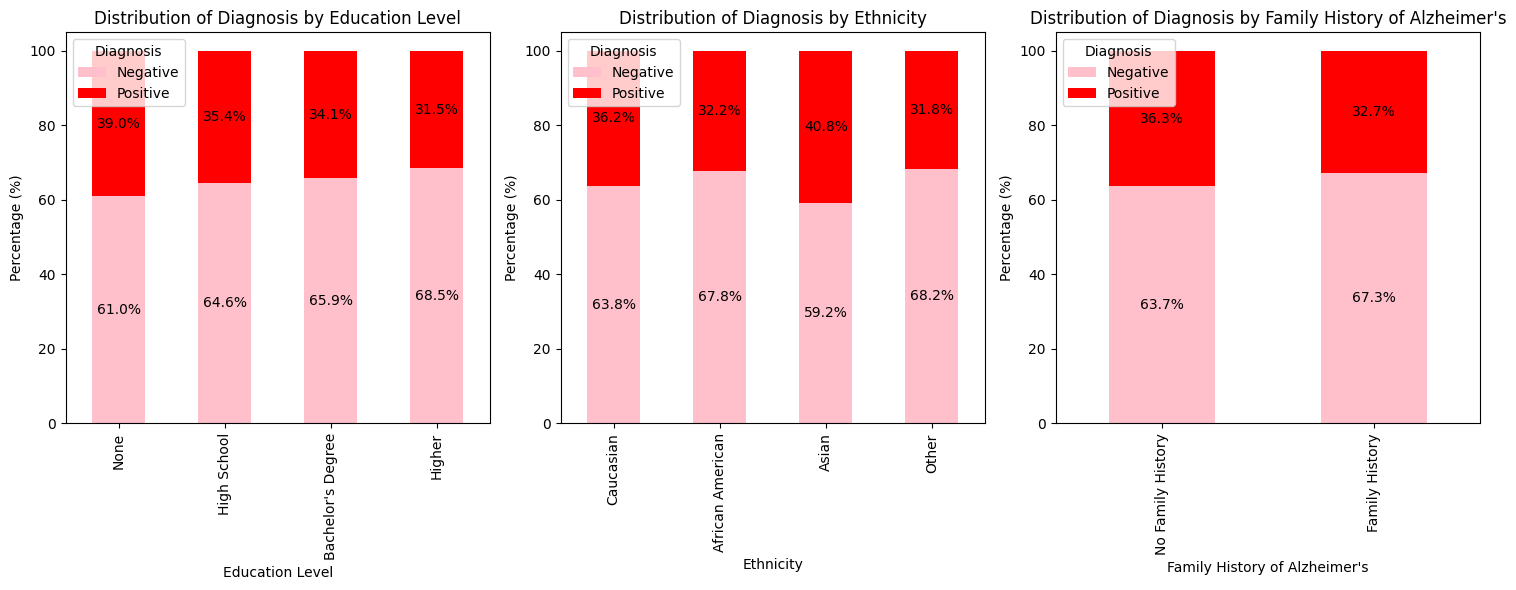

In [174]:
fig, axs = plt.subplots(1, 3, figsize=(15, 6))

education_counts.plot(kind='bar', stacked=True, ax=axs[0], color=['pink', 'Red'])
axs[0].set_title('Distribution of Diagnosis by Education Level')
axs[0].set_xlabel('Education Level')
axs[0].set_ylabel('Percentage (%)')

ethnicity_counts.plot(kind='bar', stacked=True, ax=axs[1], color=['pink', 'Red'])
axs[1].set_title('Distribution of Diagnosis by Ethnicity')
axs[1].set_xlabel('Ethnicity')
axs[1].set_ylabel('Percentage (%)')

family_history_counts.plot(kind='bar', stacked=True, ax=axs[2], color=['pink', 'Red'])
axs[2].set_title('Distribution of Diagnosis by Family History of Alzheimer\'s')
axs[2].set_xlabel('Family History of Alzheimer\'s')
axs[2].set_ylabel('Percentage (%)')

for ax in axs:
    for container in ax.containers:
        ax.bar_label(container, label_type='center', fontsize=10, fmt='%.1f%%')

plt.tight_layout()
plt.show()




It seems that the more the education, the lesser the prevalence of positive outcomes. Also, the Asian population has the most positive cases. I was also expecting those with family history of Alzheimer's to have more proportions of positive cases, so I'll run a chi-test and get the p-values to see if there is any statistical significance here

In [175]:
from scipy.stats import chi2_contingency

# Example: comparing Diagnosis vs. SmokingStatus
contingency_table = pd.crosstab(df['Diagnosis'], df['EducationLevel'])
chi2, p_1, dof, expected = chi2_contingency(contingency_table)

contingency_table = pd.crosstab(df['Diagnosis'], df['Ethnicity'])
chi2, p_2, dof, expected = chi2_contingency(contingency_table)

contingency_table = pd.crosstab(df['Diagnosis'], df['FamilyHistoryAlzheimers'])
chi2, p_3, dof, expected = chi2_contingency(contingency_table)

print(f"P-value for EducationLevel vs. Diagnosis: {round(p_1, 3)}")
print(f"P-value for Ethnicity vs. Diagnosis: {round(p_2, 3)}")
print(f"P-value for FamilyHistoryAlzheimers vs. Diagnosis: {round(p_3, 3)}")

P-value for EducationLevel vs. Diagnosis: 0.217
P-value for Ethnicity vs. Diagnosis: 0.098
P-value for FamilyHistoryAlzheimers vs. Diagnosis: 0.141


1. Education Levels: With a p-value of 0.217 is much larger than 0.05, so: There's no strong evidence that education level affects the outcome in your sample. Any differences in this chart could have happened by chance.

2. Ethnicity: The p-value is 0.098, which is greater than alpha level of 0.05 but less than 0.10. This suggests that there is a marginal statistical significance, implying that there may be some differences among the different ethnic groups. It’s worth exploring further, but we do not draw strong conclusions yet.

3. Family History: The p-value is 0.141, which is greater than alpha level of 0.05. The observed difference between those with/without family history is likely due to random variation in the data. There's not enough evidence to say that family history is a factor in this sample.

In [176]:
# Filter for patients with Alzheimer's diagnosis
alzheimer_patients = df[df['Diagnosis'] == 1]

# Select comorbidity columns
comorbidity_cols = binary_cols

# Calculate the sum of each comorbidity for Alzheimer's patients
comorbidity_counts = alzheimer_patients[comorbidity_cols].sum()

# Create a DataFrame from the counts
comorbidity_counts_df = pd.DataFrame({'Comorbidity': comorbidity_counts.index, 'Count': comorbidity_counts.values})

# Display the DataFrame
print("Comorbidity counts among patients with Alzheimer's:")
display(comorbidity_counts_df)

Comorbidity counts among patients with Alzheimer's:


Comorbidity  Count
0                     Smoking    217
1     FamilyHistoryAlzheimers    177
2       CardiovascularDisease    121
3                    Diabetes    103
4                  Depression    150
5                  HeadInjury     64
6                Hypertension    126
7            MemoryComplaints    286
8          BehavioralProblems    203
9                   Confusion    148
10             Disorientation    111
11         PersonalityChanges    107
12  DifficultyCompletingTasks    124
13              Forgetfulness    229

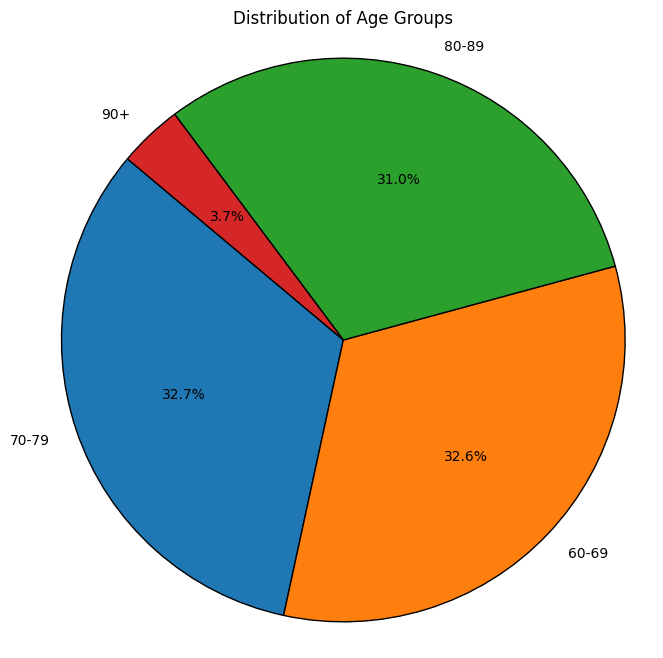

In [177]:
# Create age groups (if not already created)
bins = [60, 70, 80, 90, 100]
labels = ['60-69', '70-79', '80-89', '90+']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Calculate the counts for each age group
age_group_counts = df['AgeGroup'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
age_group_counts.plot.pie(autopct='%1.1f%%', startangle=140, colors=sns.color_palette('tab10'), wedgeprops={'edgecolor': 'black'})
plt.title('Distribution of Age Groups')
plt.ylabel('') # Remove the default ylabel
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

90+ people are underrepresented in our dataset

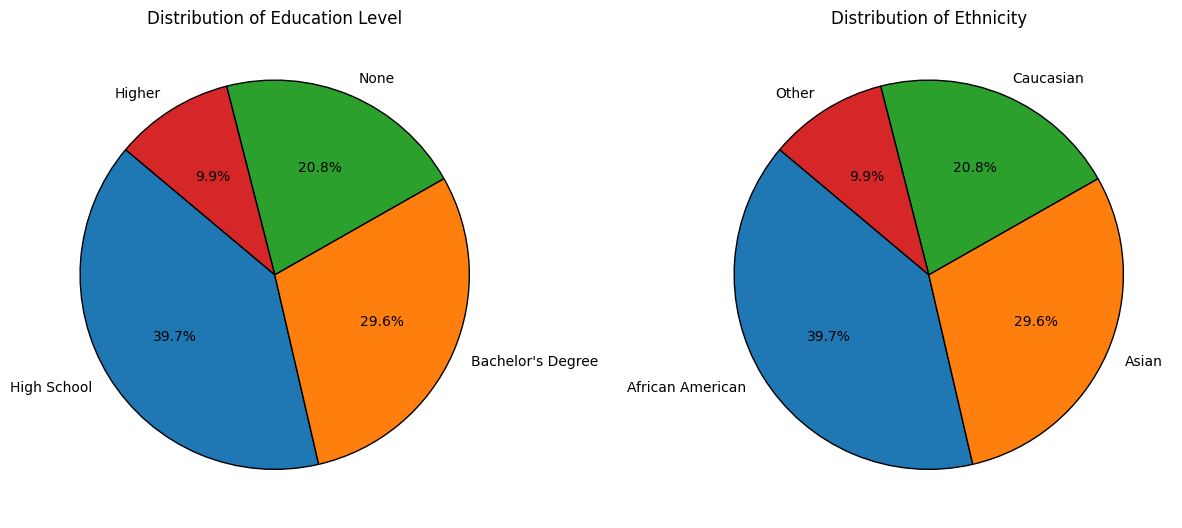

In [178]:
# Pie chart for Education Level distribution
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1) # 1 row, 2 columns, 1st plot
df['Education_Level'].value_counts().plot.pie(autopct='%1.1f%%', startangle=140, colors=sns.color_palette('tab10'), wedgeprops={'edgecolor': 'black'})
plt.title('Distribution of Education Level')
plt.ylabel('') # Remove the default ylabel

# Pie chart for Ethnicity distribution
plt.subplot(1, 2, 2) # 1 row, 2 columns, 2nd plot
df['Ethnicity_Label'].value_counts().plot.pie(autopct='%1.1f%%', startangle=140, colors=sns.color_palette('tab10'), wedgeprops={'edgecolor': 'black'})
plt.title('Distribution of Ethnicity')
plt.ylabel('') # Remove the default ylabel

plt.tight_layout()
plt.show()

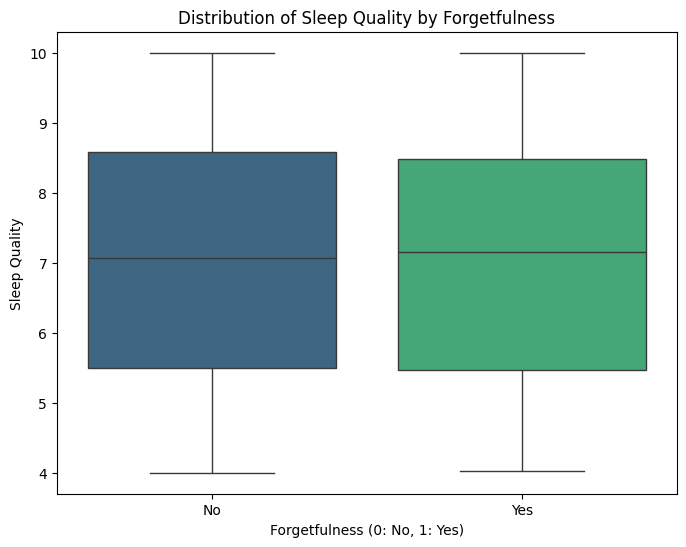

In [179]:
# Create boxplot of SleepQuality by Forgetfulness
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Forgetfulness', y='SleepQuality', palette='viridis')
plt.title('Distribution of Sleep Quality by Forgetfulness')
plt.xlabel('Forgetfulness (0: No, 1: Yes)')
plt.ylabel('Sleep Quality')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

Sleep quality and forgetfulness aren't exactly correlated here

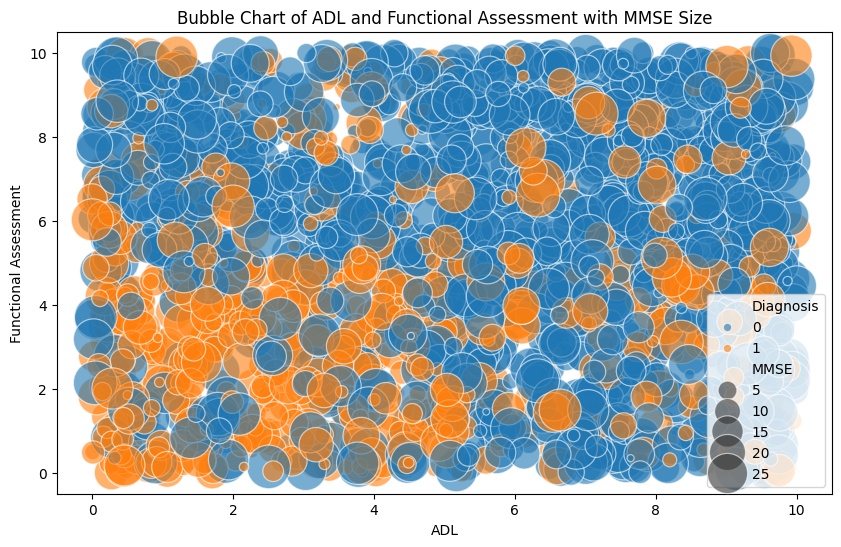

In [180]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='ADL', y='FunctionalAssessment', size='MMSE', alpha=0.6, sizes=(20, 1000), hue='Diagnosis')
plt.title('Bubble Chart of ADL and Functional Assessment with MMSE Size')
plt.xlabel('ADL')
plt.ylabel('Functional Assessment')
plt.show()

In [181]:
# Identify categorical columns (object dtype)
categorical_cols = df.select_dtypes(include='object').columns.tolist()

# Drop categorical columns and 'PatientID'
df_numeric = df.drop(columns=categorical_cols + ['PatientID'] + ['AgeGroup'])

# Display the first few rows of the new dataframe to verify
display(df_numeric.head())

Age  Gender  Ethnicity  EducationLevel        BMI  Smoking  \
0   73       0          0               2  22.927749        0   
1   89       0          0               0  26.827681        0   
2   73       0          3               1  17.795882        0   
3   74       1          0               1  33.800817        1   
4   89       0          0               0  20.716974        0   

   AlcoholConsumption  PhysicalActivity  DietQuality  SleepQuality  \
0           13.297218          6.327112     1.347214      9.025679   
1            4.542524          7.619885     0.518767      7.151293   
2           19.555085          7.844988     1.826335      9.673574   
3           12.209266          8.428001     7.435604      8.392554   
4           18.454356          6.310461     0.795498      5.597238   

   FamilyHistoryAlzheimers  CardiovascularDisease  Diabetes  Depression  \
0                        0                      0         1           1   
1                        0                      0         0           0   
2                        1                      0         0           0   
3                        0                      0         0           0   
4                        0                      0         0           0   

   HeadInjury  Hypertension  SystolicBP  DiastolicBP  CholesterolTotal  \
0           0             0         142           72        242.366840   
1           0             0         115           64        231.162595   
2           0             0          99          116        284.181858   
3           0             0         118          115        159.582240   
4           0             0          94          117        237.602184   

   CholesterolLDL  CholesterolHDL  CholesterolTriglycerides       MMSE  \
0       56.150897       33.682563                162.189143  21.463532   
1      193.407996       79.028477                294.630909  20.613267   
2      153.322762       69.772292                 83.638324   7.356249   
3       65.366637       68.457491                277.577358  13.991127   
4       92.869700       56.874305                291.198780  13.517609   

   FunctionalAssessment  MemoryComplaints  BehavioralProblems       ADL  \
0              6.518877                 0                   0  1.725883   
1              7.118696                 0                   0  2.592424   
2              5.895077                 0                   0  7.119548   
3              8.965106                 0                   1  6.481226   
4              6.045039                 0                   0  0.014691   

   Confusion  Disorientation  PersonalityChanges  DifficultyCompletingTasks  \
0          0               0                   0                          1   
1          0               0                   0                          0   
2          0               1                   0                          1   
3          0               0                   0                          0   
4          0               0                   1                          1   

   Forgetfulness  Diagnosis  
0              0          0  
1              1          0  
2              0          0  
3              0          0  
4              0          0

Dropped all categorical columns

In [182]:
len(df_numeric.columns)

33

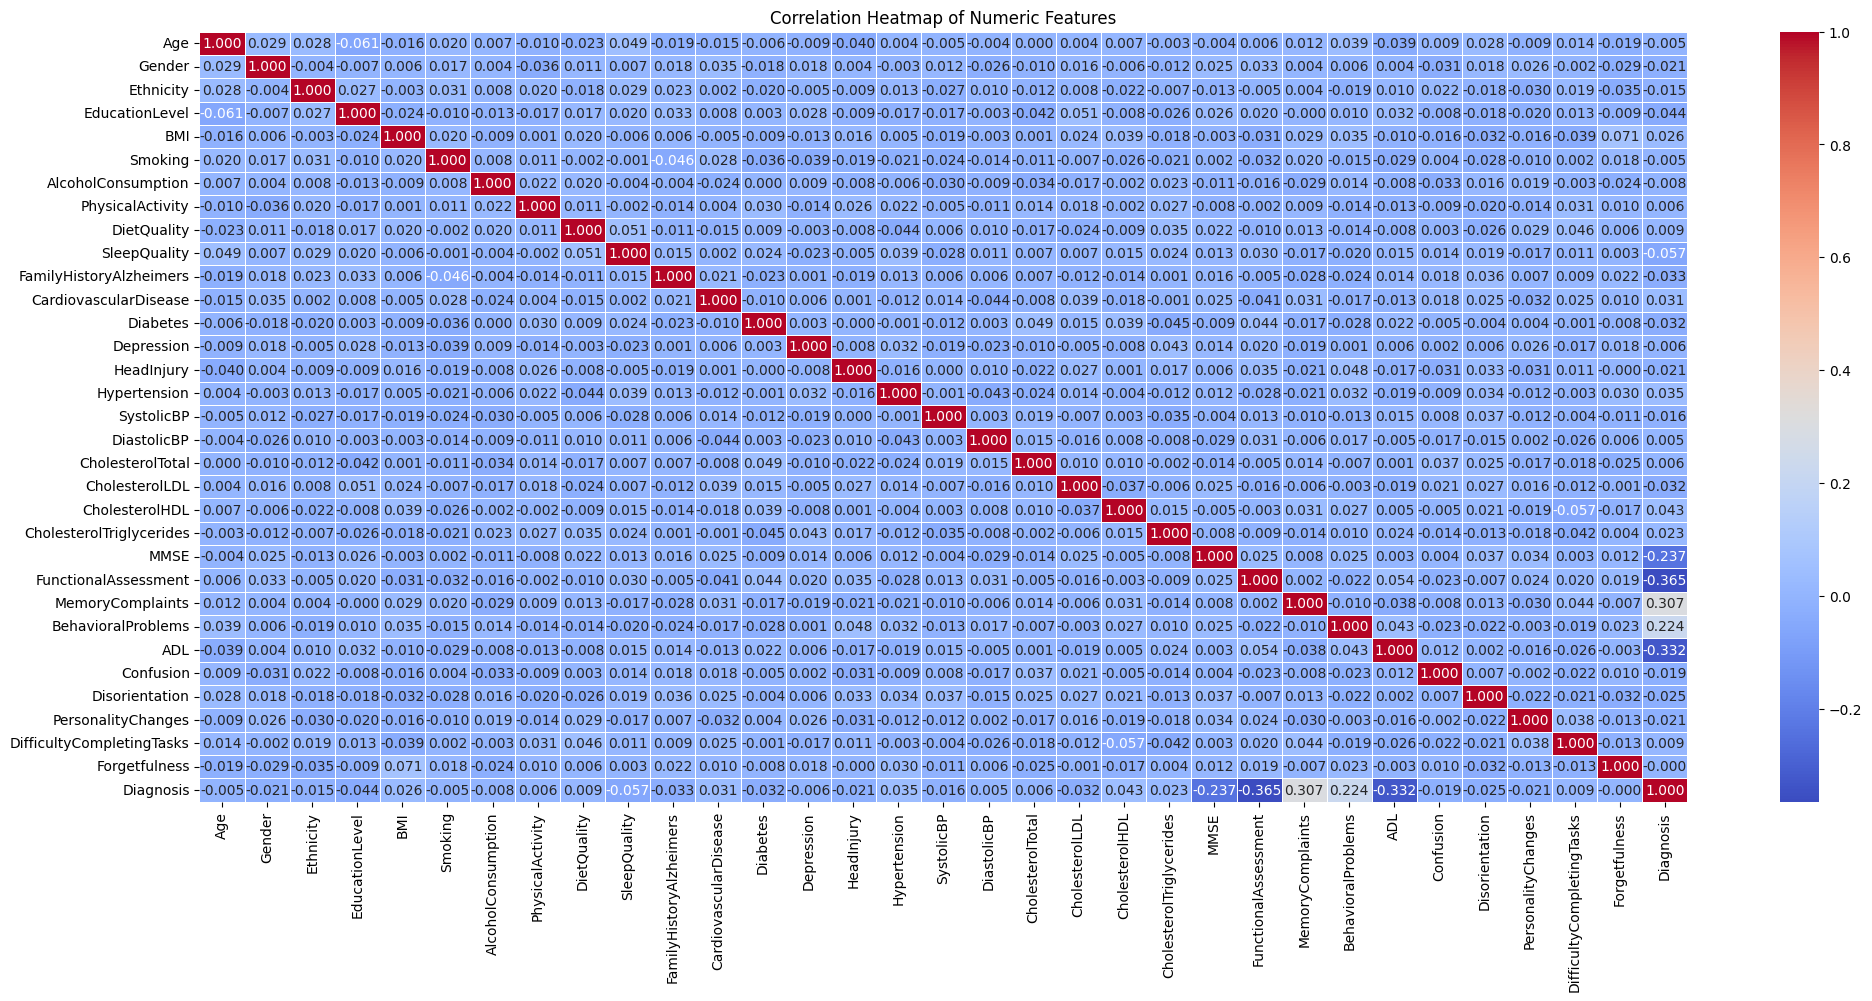

In [183]:
# Calculate the correlation matrix
correlation_matrix = df_numeric.corr()

# Create a heatmap
plt.figure(figsize=(24, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".3f", linewidths=.5)
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

The top four features that are the most correlated to outcome are: FunctionalAssessment, ADL, MemoryComplaints, MMSE, and BehaviouralProblems

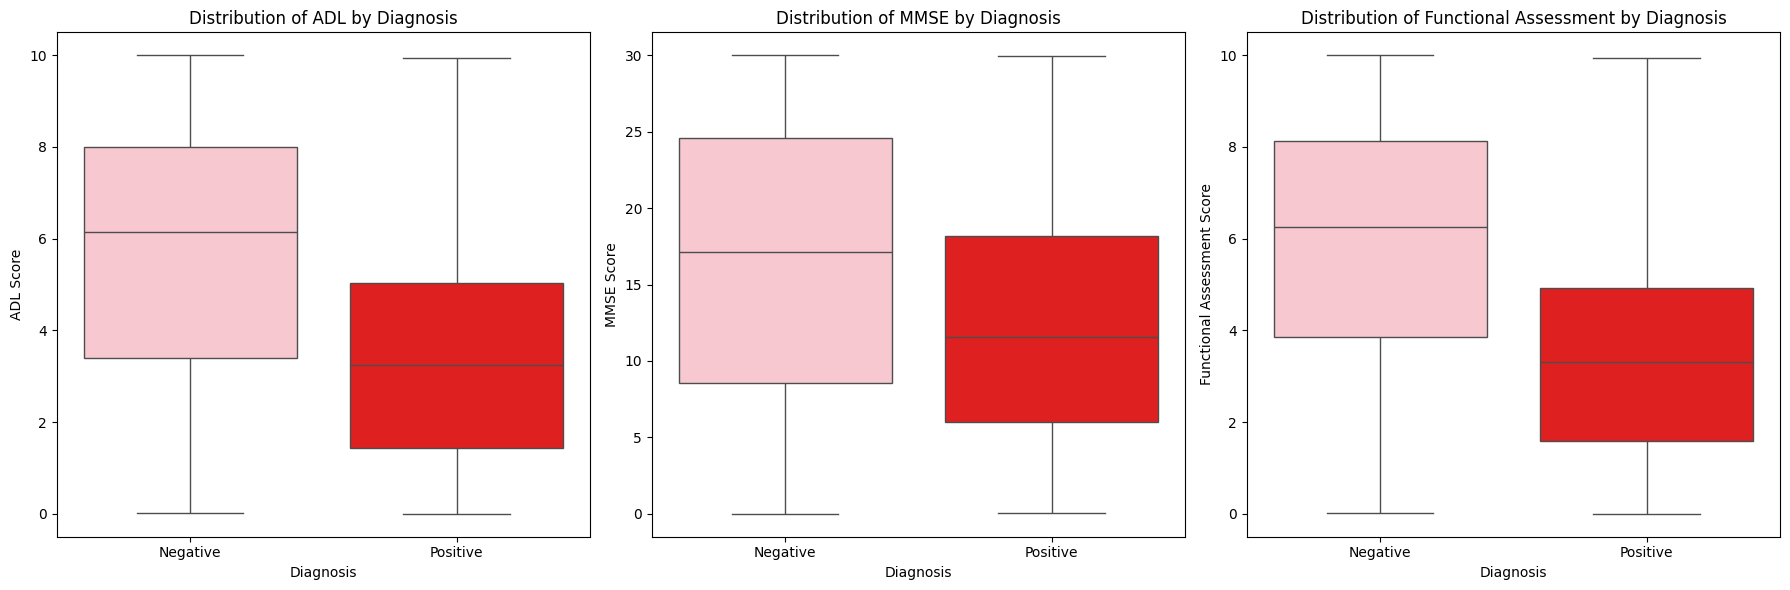

In [184]:
# Create subplots for the box plots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Boxplot of ADL by Diagnosis
sns.boxplot(data=df, x='Outcome', y='ADL', palette=['pink', 'Red'], ax=axes[0])
axes[0].set_title('Distribution of ADL by Diagnosis')
axes[0].set_xlabel('Diagnosis')
axes[0].set_ylabel('ADL Score')

# Boxplot of MMSE by Diagnosis
sns.boxplot(data=df, x='Outcome', y='MMSE', palette=['pink', 'Red'], ax=axes[1])
axes[1].set_title('Distribution of MMSE by Diagnosis')
axes[1].set_xlabel('Diagnosis')
axes[1].set_ylabel('MMSE Score')

# Boxplot of Functional Assessment by Diagnosis
sns.boxplot(data=df, x='Outcome', y='FunctionalAssessment', palette=['pink', 'Red'], ax=axes[2])
axes[2].set_title('Distribution of Functional Assessment by Diagnosis')
axes[2].set_xlabel('Diagnosis')
axes[2].set_ylabel('Functional Assessment Score')

plt.tight_layout()
plt.show()

Confirms the theory that these features are the most important in testing for Alzheimers

# Machine Learning


In [185]:
X = df_numeric.drop(columns=['Diagnosis'])
y = df_numeric['Diagnosis']

In [186]:
X.shape

(2149, 32)

In [187]:
y.shape

(2149,)

In [188]:
scaler = StandardScaler()

scaledX = scaler.fit_transform(X)

In [189]:
scaledX

array([[-0.21236841, -1.01264391, -0.70040826, ..., -0.42134813,
         2.30261868, -0.65704809],
       [ 1.56775727, -1.01264391, -0.70040826, ..., -0.42134813,
        -0.43428815,  1.52195861],
       [-0.21236841, -1.01264391,  2.31195467, ..., -0.42134813,
         2.30261868, -0.65704809],
       ...,
       [ 0.23266301, -1.01264391, -0.70040826, ..., -0.42134813,
        -0.43428815, -0.65704809],
       [ 0.34392086,  0.98751396,  2.31195467, ..., -0.42134813,
        -0.43428815,  1.52195861],
       [-0.32362627, -1.01264391, -0.70040826, ..., -0.42134813,
        -0.43428815,  1.52195861]])

In [190]:
X_train, X_test, y_train, y_test = train_test_split(scaledX, y, test_size=0.2, random_state=42)

In [191]:
forest = RandomForestClassifier(random_state=56)
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=56)

In [192]:
forest_preds = forest.predict(X_test)

In [193]:
print(f"Accuracy Score for Random Forest Classifier: {accuracy_score(y_test, forest_preds)}\n")
print(classification_report(y_test, forest_preds))

Accuracy Score for Random Forest Classifier: 0.9232558139534883

              precision    recall  f1-score   support

           0       0.91      0.98      0.94       277
           1       0.96      0.82      0.88       153

    accuracy                           0.92       430
   macro avg       0.93      0.90      0.91       430
weighted avg       0.93      0.92      0.92       430



In [194]:
cm_forest = confusion_matrix(y_test, forest_preds)
cm_forest

array([[272,   5],
       [ 28, 125]])

In [195]:
tn, fp, fn, tp = cm_forest.ravel()

print(f"True Positives (TP): {tp}")
print(f"False Positives (FP): {fp}")
print(f"True Negatives (TN): {tn}")
print(f"False Negatives (FN): {fn}")

True Positives (TP): 125
False Positives (FP): 5
True Negatives (TN): 272
False Negatives (FN): 28


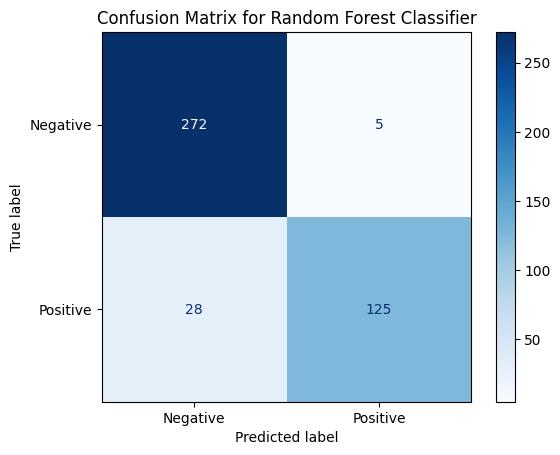

In [196]:
# Define the labels for the confusion matrix
labels = ['Negative', 'Positive']

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_forest, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()

In [197]:
forest_prob = forest.predict_proba(X_test)[:, 1] #probability for positive class

auc_score_forest = roc_auc_score(y_test, forest_prob) #Displays how well model can distingusih between positive and negative classes
print(auc_score_forest)

0.9513225266039027


## Decison Tree Classifier

In [198]:
#Initialize the decison tree classifier
tree = DecisionTreeClassifier(random_state=56)

In [199]:
# Fit the model to the training data
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=56)

In [200]:
# Make predictions on the test data
tree_preds = tree.predict(X_test)

In [201]:
features = X.columns.to_list()

In [202]:
features

['Age',
 'Gender',
 'Ethnicity',
 'EducationLevel',
 'BMI',
 'Smoking',
 'AlcoholConsumption',
 'PhysicalActivity',
 'DietQuality',
 'SleepQuality',
 'FamilyHistoryAlzheimers',
 'CardiovascularDisease',
 'Diabetes',
 'Depression',
 'HeadInjury',
 'Hypertension',
 'SystolicBP',
 'DiastolicBP',
 'CholesterolTotal',
 'CholesterolLDL',
 'CholesterolHDL',
 'CholesterolTriglycerides',
 'MMSE',
 'FunctionalAssessment',
 'MemoryComplaints',
 'BehavioralProblems',
 'ADL',
 'Confusion',
 'Disorientation',
 'PersonalityChanges',
 'DifficultyCompletingTasks',
 'Forgetfulness']

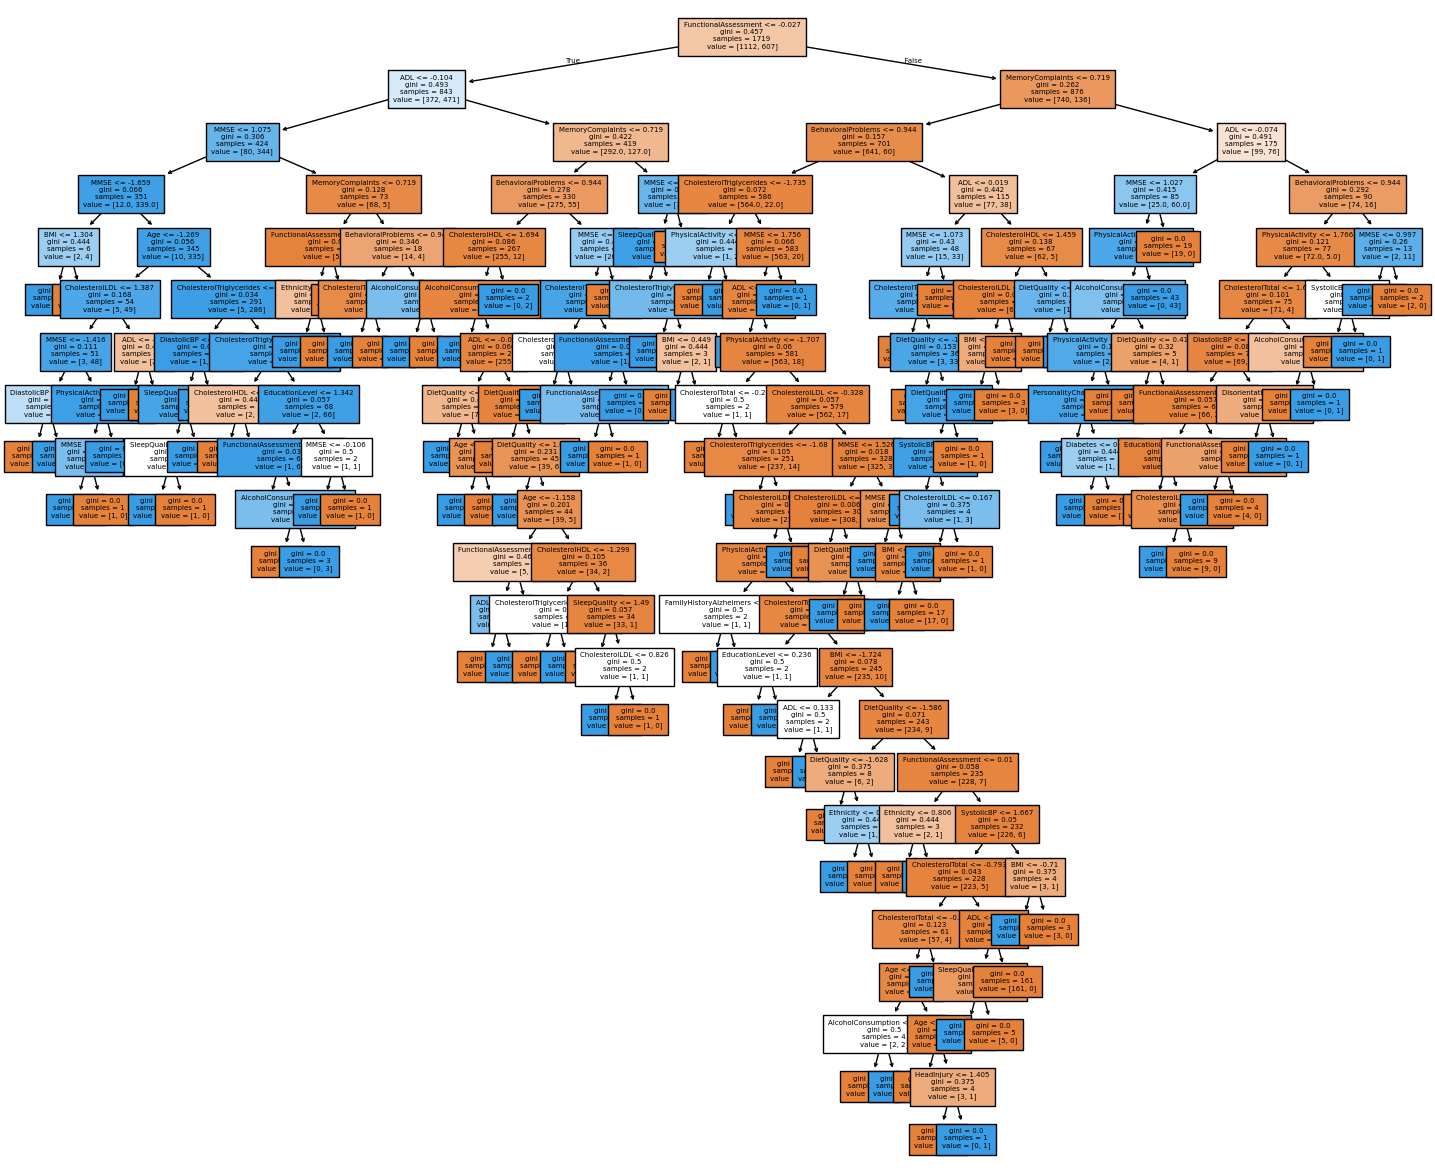

In [211]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

plt.figure(figsize=(18, 15))
plot_tree(tree, feature_names=features, filled=True, fontsize=5)
plt.show()

In [212]:
# Evaluate the model
print(f"Accuracy Score for Decision Tree Classifier: {accuracy_score(y_test, tree_preds)}\n")
print(classification_report(y_test, tree_preds))

Accuracy Score for Decision Tree Classifier: 0.9

              precision    recall  f1-score   support

           0       0.91      0.93      0.92       277
           1       0.87      0.84      0.86       153

    accuracy                           0.90       430
   macro avg       0.89      0.89      0.89       430
weighted avg       0.90      0.90      0.90       430



In [213]:
# Confusion Matrix
cm_tree = confusion_matrix(y_test, tree_preds)
print("Confusion Matrix:")
print(cm_tree)

Confusion Matrix:
[[258  19]
 [ 24 129]]


In [214]:
# Extracting TP, FP, TN, FN
tn, fp, fn, tp = cm_tree.ravel()
print(f"\nTrue Positives (TP): {tp}")
print(f"False Positives (FP): {fp}")
print(f"True Negatives (TN): {tn}")
print(f"False Negatives (FN): {fn}")


True Positives (TP): 129
False Positives (FP): 19
True Negatives (TN): 258
False Negatives (FN): 24


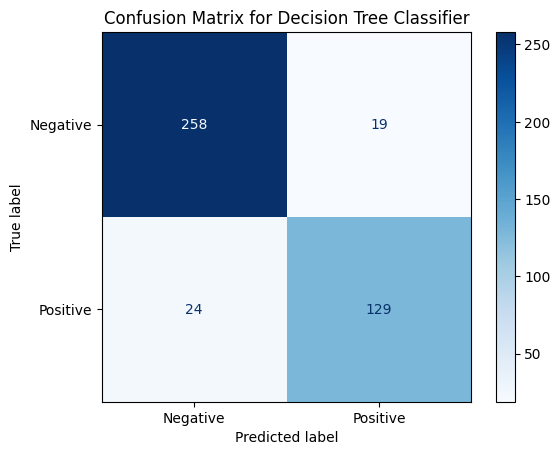

In [215]:
# Plot the confusion matrix
labels = ['Negative', 'Positive']
disp = ConfusionMatrixDisplay(confusion_matrix=cm_tree, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()

## Tuned Decision Tree

In [216]:
tree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 56,
 'splitter': 'best'}

In [217]:
# Define the parameter grid for Decision Tree
param_grid_tree = {'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8],
    'criterion': ['gini', 'entropy']
}

In [218]:
# Initialize GridSearchCV
# cv=5 means 5-fold cross-validation
# scoring='accuracy' or 'roc_auc' depending on the evaluation metric you prefer
grid_search_tree = GridSearchCV(estimator=tree, param_grid=param_grid_tree, cv=5, scoring='accuracy')

In [219]:
# Fit GridSearchCV to the training data
grid_search_tree.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=56),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15, 20],
                         'min_samples_leaf': [1, 2, 4, 8],
                         'min_samples_split': [2, 5, 10, 20]},
             scoring='accuracy')

In [220]:
# Get the best parameters and the best score
best_params_tree = grid_search_tree.best_params_
best_score_tree = grid_search_tree.best_score_

In [221]:
print(f"\nBest parameters found by Grid Search for Decision Tree: {best_params_tree}")
print(f"Best cross-validation accuracy score for Decision Tree: {best_score_tree:.4f}")


Best parameters found by Grid Search for Decision Tree: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 20}
Best cross-validation accuracy score for Decision Tree: 0.9482


In [222]:
# Use the best estimator to make predictions on the test set
best_tree_model = grid_search_tree.best_estimator_
best_tree_preds = best_tree_model.predict(X_test)

In [223]:
# Evaluate the best model on the test set
print(f"\nAccuracy Score for Tuned Decision Tree Classifier on Test Set: {accuracy_score(y_test, best_tree_preds)}\n")
print("Classification Report for Tuned Decision Tree Classifier:")
print(classification_report(y_test, best_tree_preds))


Accuracy Score for Tuned Decision Tree Classifier on Test Set: 0.9465116279069767

Classification Report for Tuned Decision Tree Classifier:
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       277
           1       0.93      0.92      0.92       153

    accuracy                           0.95       430
   macro avg       0.94      0.94      0.94       430
weighted avg       0.95      0.95      0.95       430



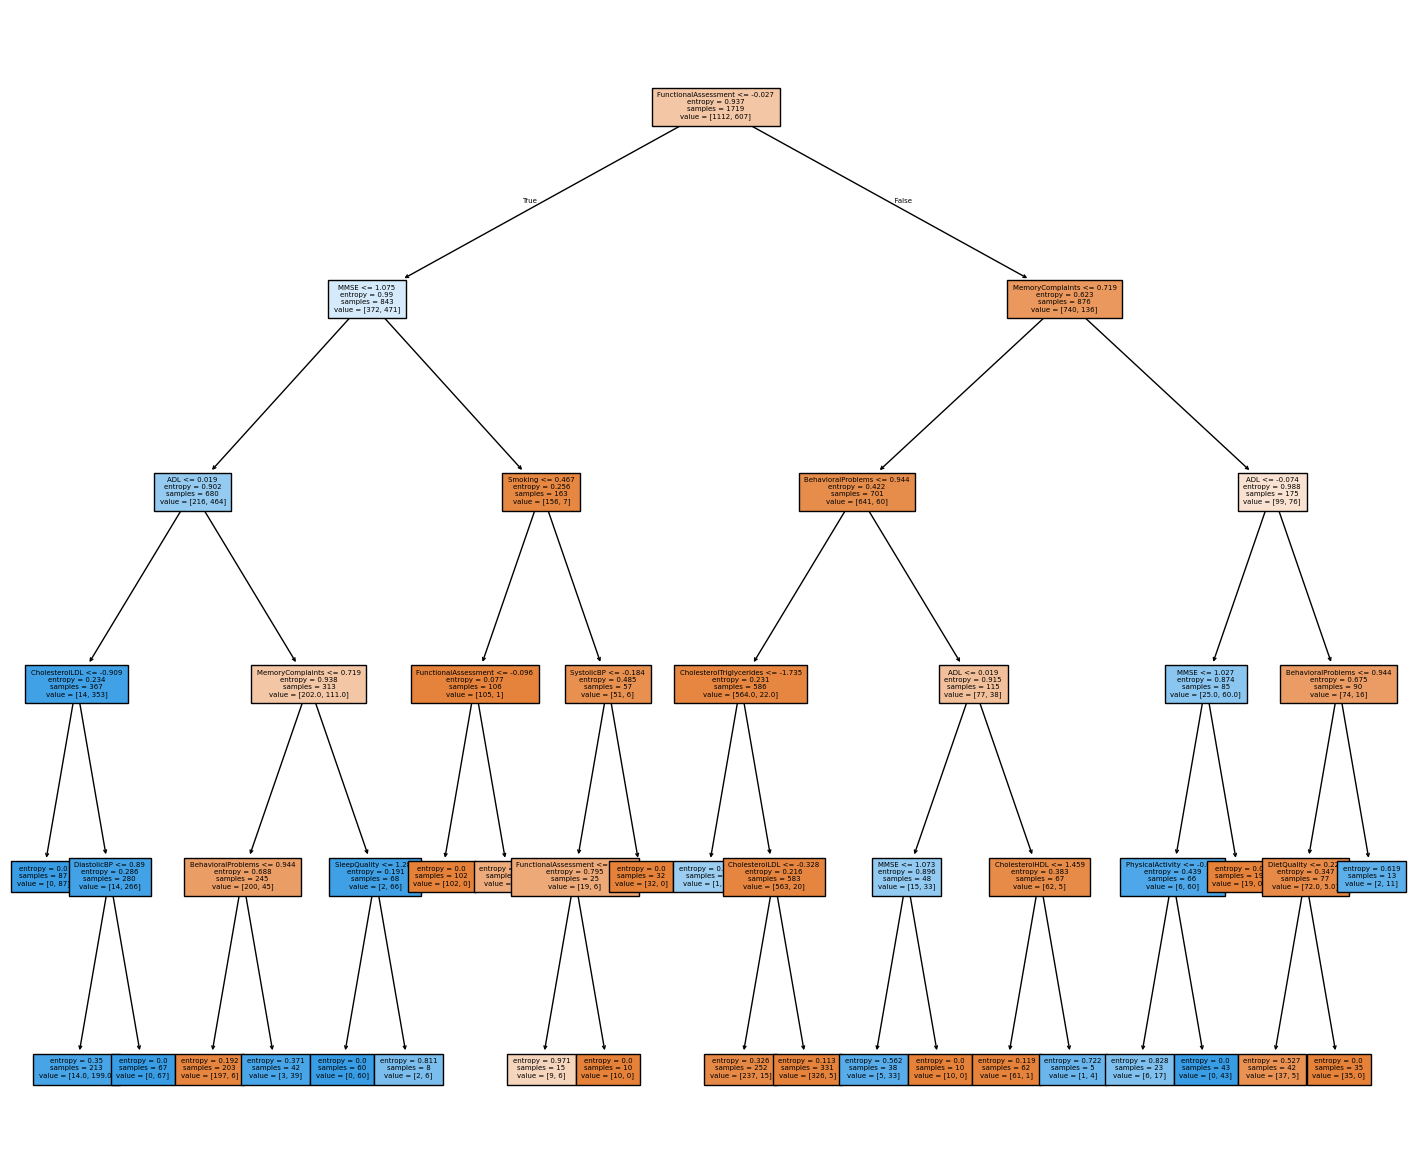

In [241]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

plt.figure(figsize=(18, 15))
plot_tree(best_tree_model, feature_names=features, filled=True, fontsize=5)
plt.show()

In [224]:
# Confusion Matrix for the best model
cm_best_tuned_tree = confusion_matrix(y_test, best_tree_preds)
print("\nConfusion Matrix for Tuned Decision Tree Classifier:")
print(cm_best_tuned_tree)


Confusion Matrix for Tuned Decision Tree Classifier:
[[267  10]
 [ 13 140]]


In [225]:
# Extracting TP, FP, TN, FN for the best model
tn, fp, fn, tp = cm_best_tuned_tree.ravel()
print(f"\nTrue Positives (TP): {tp}")
print(f"False Positives (FP): {fp}")
print(f"True Negatives (TN): {tn}")
print(f"False Negatives (FN): {fn}")


True Positives (TP): 140
False Positives (FP): 10
True Negatives (TN): 267
False Negatives (FN): 13


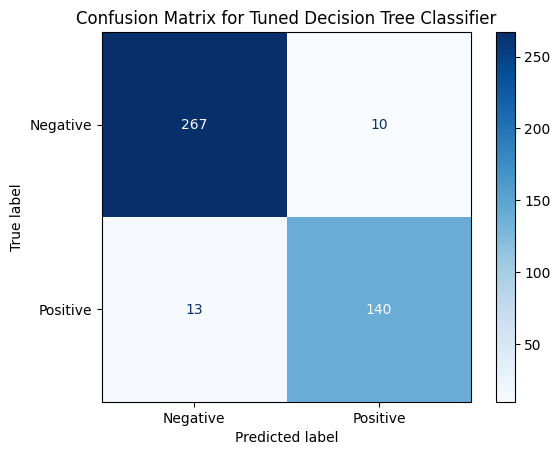

In [226]:
# Plot the confusion matrix for the best model
disp = ConfusionMatrixDisplay(confusion_matrix=cm_best_tuned_tree, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Tuned Decision Tree Classifier')
plt.show()

In [227]:
# ROC AUC Score for the best model
best_tree_prob = best_tree_model.predict_proba(X_test)[:, 1]
auc_score_best_tree = roc_auc_score(y_test, best_tree_prob)
print(f"\nROC AUC Score for Tuned Decision Tree Classifier on Test Set: {auc_score_best_tree:.4f}")


ROC AUC Score for Tuned Decision Tree Classifier on Test Set: 0.9507


## Gradient Boost Classifier

In [228]:
gbc = GradientBoostingClassifier(random_state=42)

In [229]:
gbc.fit(X_train, y_train)
gbc_preds= gbc.predict(X_test)

In [242]:
print(classification_report(y_test, gbc_preds))
print(f"Accuracy Score for Gradient Boosting Classifier: {accuracy_score(y_test, gbc_preds)}\n")

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       277
           1       0.96      0.92      0.94       153

    accuracy                           0.96       430
   macro avg       0.96      0.95      0.95       430
weighted avg       0.96      0.96      0.96       430

Accuracy Score for Gradient Boosting Classifier: 0.958139534883721



In [231]:
# Confusion Matrix
cm_gbc= confusion_matrix(y_test, gbc_preds)
print("Confusion Matrix:")
print(cm_gbc)

Confusion Matrix:
[[271   6]
 [ 12 141]]


In [232]:
# Extracting TP, FP, TN, FN for the best model
tn, fp, fn, tp = cm_gbc.ravel()
print(f"\nTrue Positives (TP): {tp}")
print(f"False Positives (FP): {fp}")
print(f"True Negatives (TN): {tn}")
print(f"False Negatives (FN): {fn}")


True Positives (TP): 141
False Positives (FP): 6
True Negatives (TN): 271
False Negatives (FN): 12


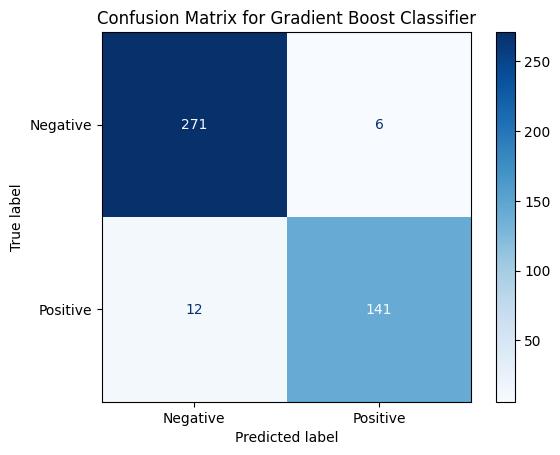

In [243]:
# Plot the confusion matrix
labels = ['Negative', 'Positive']
disp = ConfusionMatrixDisplay(confusion_matrix=cm_gbc, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Gradient Boost Classifier')
plt.show()

## XGB Classifier

In [234]:
xgb_model = xgb.XGBClassifier(random_state=42)

In [235]:
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [236]:
xgb_preds = xgb_model.predict(X_test)

In [237]:
# Evaluate the model
print(f"Accuracy Score for Decision Tree Classifier: {accuracy_score(y_test, xgb_preds)}\n")
print(classification_report(y_test, xgb_preds))

Accuracy Score for Decision Tree Classifier: 0.9511627906976744

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       277
           1       0.96      0.90      0.93       153

    accuracy                           0.95       430
   macro avg       0.95      0.94      0.95       430
weighted avg       0.95      0.95      0.95       430



## Feature Selection & Model Evaluation

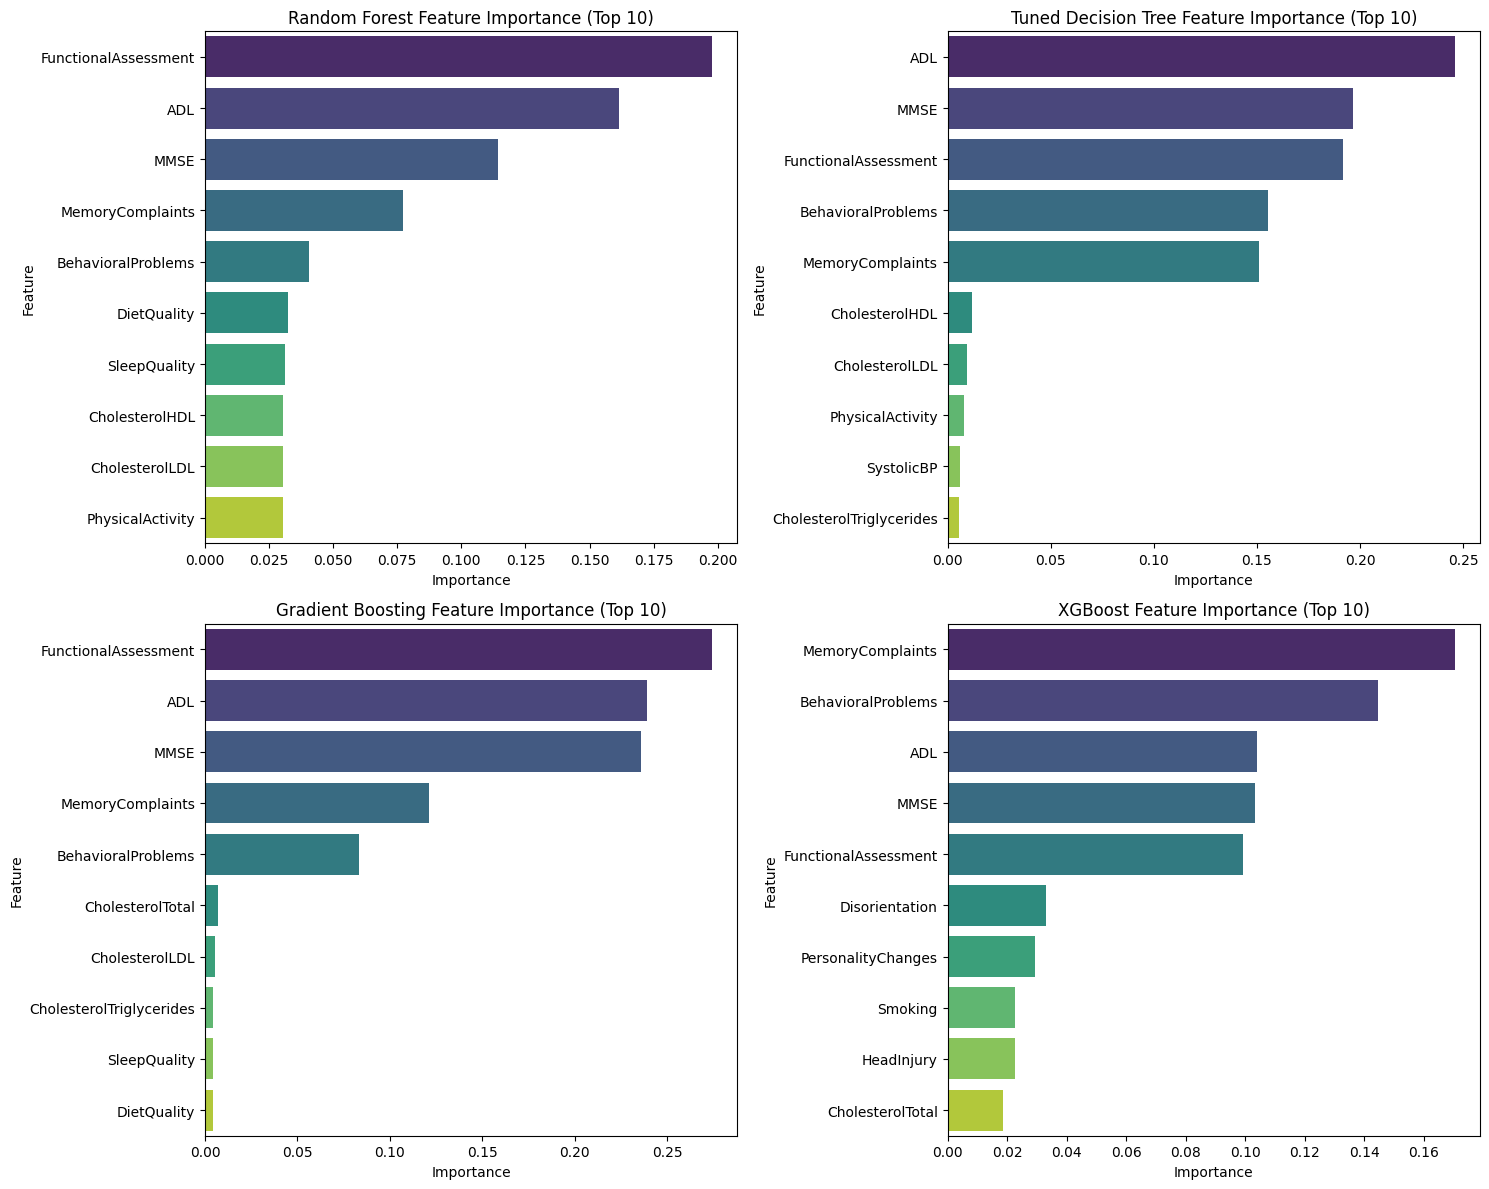

In [238]:
# Get feature importances from each model
feature_importances_forest = forest.feature_importances_
feature_importances_tuned_tree = best_tree_model.feature_importances_
feature_importances_gbc = gbc.feature_importances_
feature_importances_xgb = xgb_model.feature_importances_

# Get feature names
feature_names = X.columns

# Create DataFrames for feature importances
df_feature_importances_forest = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances_forest}).sort_values(by='Importance', ascending=False)
df_feature_importances_tuned_tree = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances_tuned_tree}).sort_values(by='Importance', ascending=False)
df_feature_importances_gbc = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances_gbc}).sort_values(by='Importance', ascending=False)
df_feature_importances_xgb = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances_xgb}).sort_values(by='Importance', ascending=False)


# Create a grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.flatten()

# Plot feature importances for each model
sns.barplot(x='Importance', y='Feature', data=df_feature_importances_forest.head(10), ax=axes[0], palette='viridis')
axes[0].set_title('Random Forest Feature Importance (Top 10)')

sns.barplot(x='Importance', y='Feature', data=df_feature_importances_tuned_tree.head(10), ax=axes[1], palette='viridis')
axes[1].set_title('Tuned Decision Tree Feature Importance (Top 10)')

sns.barplot(x='Importance', y='Feature', data=df_feature_importances_gbc.head(10), ax=axes[2], palette='viridis')
axes[2].set_title('Gradient Boosting Feature Importance (Top 10)')

sns.barplot(x='Importance', y='Feature', data=df_feature_importances_xgb.head(10), ax=axes[3], palette='viridis')
axes[3].set_title('XGBoost Feature Importance (Top 10)')

plt.tight_layout()
plt.show()

Our key features that contribute mostly to our predicted values are: ADL, Functional Asssessment Scores, MMSE, Memory Complaints and Behavioral Complaints. We can boldly say these are our key indicators of detecting Alzheimer's in patients

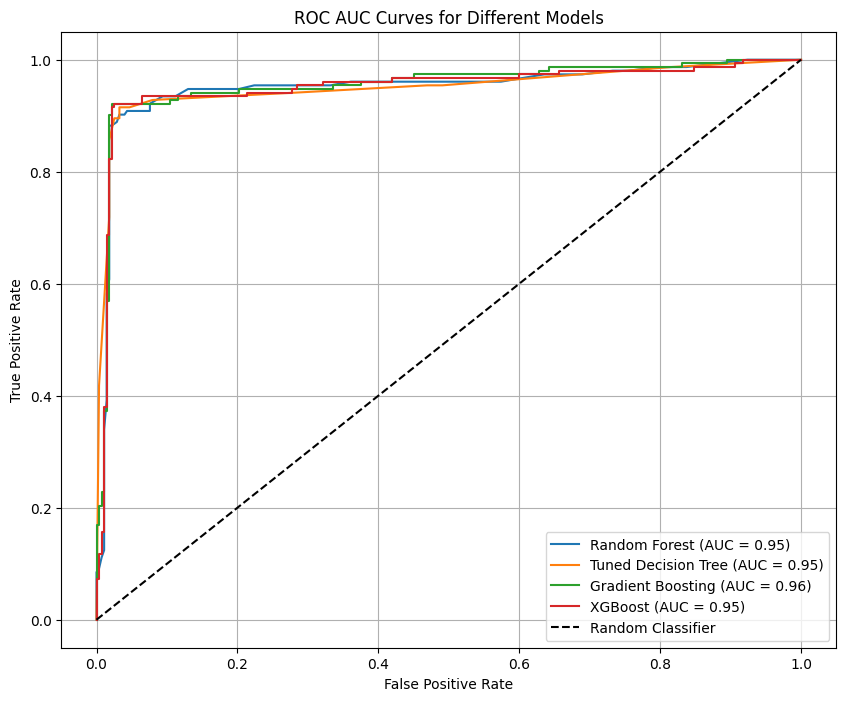

In [239]:
# _ signifies the thresholds

# Calculate ROC curve and AUC for each model
fpr_forest, tpr_forest, _ = roc_curve(y_test, forest_prob)
auc_forest = roc_auc_score(y_test, forest_prob)

# best_tree_prob is already calculated from the tuned Decision Tree model
fpr_tuned_tree, tpr_tuned_tree, _ = roc_curve(y_test, best_tree_prob)
auc_tuned_tree = roc_auc_score(y_test, best_tree_prob)

# gbc_preds and gbc_prob are already calculated from the Gradient Boosting model
gbc_prob = gbc.predict_proba(X_test)[:, 1]
fpr_gbc, tpr_gbc, _ = roc_curve(y_test, gbc_prob)
auc_gbc = roc_auc_score(y_test, gbc_prob)

# xgb_preds and xgb_prob are already calculated from the XGBoost model
xgb_prob = xgb_model.predict_proba(X_test)[:, 1]
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_prob)
auc_xgb = roc_auc_score(y_test, xgb_prob)


# Plot the ROC curves
plt.figure(figsize=(10, 8))
plt.plot(fpr_forest, tpr_forest, label=f'Random Forest (AUC = {auc_forest:.2f})')
plt.plot(fpr_tuned_tree, tpr_tuned_tree, label=f'Tuned Decision Tree (AUC = {auc_tuned_tree:.2f})')
plt.plot(fpr_gbc, tpr_gbc, label=f'Gradient Boosting (AUC = {auc_gbc:.2f})')
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {auc_xgb:.2f})')


# Plot the diagonal line representing a random classifier
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Curves for Different Models')
plt.legend()
plt.grid(True)
plt.show()

These values give a near-perfect model performance. The models does a very good job at selection of negative and positive classes. Gradient Boosting gives us the best AUC score of 0.96